In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import matplotlib.cm as cm
from scipy.spatial import distance
import random
from sklearn import datasets
import math
from sklearn.metrics import f1_score
from sklearn.metrics import rand_score
from sklearn.metrics import normalized_mutual_info_score

# **K-Mean from scratch**

In [ ]:
def euclidean_distance(data, centroids):
 return np.sqrt(np.sum((centroids - data)**2, axis=1))

In [ ]:
 def initialize_centroids(k, data):
  # This method initializes the centroids randomly from the data points.
  centroids = np.array([])
  data_min, data_max = np.min(data, axis=0),np.max(data, axis=0) #take the range of the data

  for i in range(k):
    #take 2 random valuse in the range of the data for each cluster
    initial_centroid = np.random.uniform(data_min, data_max, size=2)
    centroids = np.append(centroids,initial_centroid,axis=0) #store the centroid

  return np.reshape(centroids,[k,2]) # reshape the array

In [ ]:
def distance_matrix(data, centroids):
    # Use cdist for efficient distance calculation

    # Initialize an empty list to store distances
    dis_matrix_list = []
    for i in range(len(data)):
        distances = cdist([data[i]], centroids, metric='euclidean')[0]
        dis_matrix_list.append(distances)

    # Convert the list to a NumPy array
    dis_matrix = np.array(dis_matrix_list)
    return dis_matrix

In [ ]:
def assign_clusters(distance_matrix):
    # Use argmin to find the index of the minimum distance for each item
    clusters = np.argmin(distance_matrix, axis=1)#np.argmin is to find the index of the minimum distance for each item
    return clusters

In [ ]:
def update_centroid(cluster):
    # Use NumPy functions for efficiency
    cluster_mean = np.mean(cluster, axis=0)
    return cluster_mean

In [ ]:
def compute_centroids(data, k, clusters):
    upCen = np.empty((k, 2))

    for i in range(k):
        cluster_indices = np.where(clusters == i)[0]
        cluster_data = data[cluster_indices]

        # Check if the cluster is not empty before updating the centroid
        if len(cluster_data) > 0:
            cent = update_centroid(cluster_data)
            upCen[i] = cent

    return upCen

In [ ]:
def label_the_data(data, clusters):
    # Add labels to the data and reshape the array
    labels = np.column_stack((data, clusters))
    return labels

In [ ]:
def not_equal(cluster, pre):
    return not np.array_equal(cluster, pre)#np.array_equal to check if the current cluster is not equal to the previous cluster.

In [ ]:
# Define colors for clusters and centroids
colorsClusters = ['blue', 'green', 'purple']
colorsCentroid = [(0.0, 0.0, 0.5, 1.0), (0.0, 0.5, 0.0, 1.0)]

In [ ]:
def KMeans(X, k, t=10, y=None):

    prev_clusters = np.zeros(len(X))# Initialize prev_clusters before the loop ==300
    clusters = None# Initialize clusters

    # to plot the centroids in different colors
    c_ = np.arange(start=1, stop=k+1, step=1)

    # Initialize centroids randomly
    centroids = initialize_centroids(k, X)

    # Plot initial centroids
    plt.scatter(X[:, 0], X[:, 1], s=40, color='lightgray')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=60, c='red', cmap='viridis')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()

    # Compute the distance matrix
    dis_matrix = distance_matrix(X, centroids)
    # Assign data points to clusters
    clusters = assign_clusters(dis_matrix)
    # marge the data with their labels
    labels = label_the_data(X, clusters)

    for iteration in range(1, t + 1):
        print("Number of iteration:", iteration)
        prev_clusters = clusters # store the previous cluster

        # update the centroids of the clusters
        centroids = compute_centroids(X, k, clusters)

         # plot the updated centroid
        print("\nupdate the centroid :\n")
        plt.scatter(X[:,0], X[:,1],c=y ,s=40, cmap=cm.colors.ListedColormap(colorsClusters))
        plt.scatter(centroids[:,0], centroids[:,1],c=np.arange(start=1, stop=k+1, step=1) , marker='x',s=60,cmap=cm.colors.ListedColormap(colorsCentroid))
        plt.xlabel("X")
        plt.ylabel("y")
        plt.show()

        # Compute the distance matrix
        dis_matrix = distance_matrix(X, centroids)
        # Assign data points to clusters
        clusters = assign_clusters(dis_matrix)
        # Update centroids
        centroids = np.array([update_centroid(X[clusters == i]) for i in range(k)])

        # marge the data with their labels
        labels = label_the_data(X, clusters)

        # plot the clusters
        print("\nassign point to the clusters :\n")
        plt.scatter(X[:,0], X[:,1],c=y ,s=40, cmap=cm.colors.ListedColormap(colorsClusters))
        plt.scatter(centroids[:,0], centroids[:,1],c=np.arange(start=1, stop=k+1, step=1) ,marker='x',s=60,cmap=cm.colors.ListedColormap(colorsClusters))
        plt.xlabel("X")
        plt.ylabel("y")
        plt.show()

        # Plot updated centroids and clusters
        plt.title(f'Iteration {iteration}')
        plt.scatter(X[:, 0], X[:, 1], s=40, c=clusters, cmap='viridis')  # Use 'viridis' colormap for colors
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=60, color='red')  # Color centroids in red for example
        plt.xlabel("X")
        plt.ylabel("y")
        plt.show()

         # Stop condition
        if not not_equal(clusters, prev_clusters):
            break
        prev_clusters = clusters # Update prev_clusters at the end of each iteration

     # Plot final result
    plt.title('Final Result')
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=40, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=60, c='red', cmap='viridis')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()

    return clusters

# **DBSCAN from scratch**

In [ ]:
def distance(point1, point2):
    # Euclidean distance calculation
    squared_distance = sum((p1 - p2)**2 for p1, p2 in zip(point1, point2))
    euclidean_distance = math.sqrt(squared_distance)
    return euclidean_distance

In [ ]:
# Function to find neighbors of a point within a given epsilon distance.
def get_neighbors(data, point_index, eps):
    neighbors = []
    # Iterate over all other points
    for i in range(len(data)):
        # Check if the distance between points is within epsilon
        if i != point_index and distance(data[point_index], data[i]) <= eps:
            neighbors.append(i)
    return neighbors

In [ ]:
def expand_cluster(data, point_index, neighbors, curr_label, eps, minPts, labels):
    # List to store core points for the current cluster
    core_points = [(data[point_index][0], data[point_index][1])]
    # Assign the current label to the current point
    labels[point_index] = curr_label
    i = 0

    # Iterate over the neighbors
    while i < len(neighbors):
        current_neighbor = neighbors[i]
        # If the neighbor is not visited
        if labels[current_neighbor] is None:
            # Get the neighbors of the current neighbor
            current_neighbors = get_neighbors(data, current_neighbor, eps)
            # If the current neighbor is a core point
            if len(current_neighbors) >= minPts:
                # Expand the cluster and add core points to the list
                neighbors += current_neighbors
            # Add the current neighbor to the core points
            core_points.append((data[current_neighbor][0], data[current_neighbor][1]))
            # Assign the current label to the current neighbor
            labels[current_neighbor] = curr_label
        i += 1

    return core_points, labels

In [ ]:
def get_noise(data, labels):
    # Get noise points based on unassigned labels
    noise = [(data[i][0], data[i][1]) for i in range(len(data)) if labels[i] is None]
    return noise

In [ ]:
def plot_dbscan(all_core, noise):
    # Function to plot DBScan clustering results.
    for i, core in enumerate(all_core):
        X_p, Y_p = zip(*core)
        plt.scatter(X_p, Y_p, label=f'Cluster {i}')

    # Plot noise points
    if noise:
        X_noise, Y_noise = zip(*noise)
        plt.scatter(X_noise, Y_noise, color='gray', marker='x', label='Noise')

    plt.title("DBScan Clustering")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

In [ ]:
def DBSCAN(eps, minPts,data):
    # Initialize labels for all data points
    labels = [None] * len(data)
    # Variable to track current cluster label
    curr_label = 0
    # List to store core points for each cluster
    all_core = []

    # Iterate over each data point
    for i in range(len(data)):
        # If the point is not visited yet
        if labels[i] is None:
            # Get the neighbors of the current point within epsilon distance
            neighbors = get_neighbors(data, i, eps)

            # If the point is a core point
            if len(neighbors) >= minPts:
                # Increment the cluster label
                curr_label += 1
                # Expand the cluster and retrieve core points
                core_points, labels = expand_cluster(data, i, neighbors, curr_label, eps, minPts, labels)
                # Store core points for visualization
                all_core.append(core_points)

    # Get noise points
    noise = get_noise(data, labels)

    # Plot DBScan clustering results
    plot_dbscan(all_core, noise)

    return labels

In [ ]:
def make_fit(data, eps, minPts):
    labels = DBSCAN(eps, minPts, data)

    # Filter out None values from labels before calling np.unique
    unique_labels = np.unique([label for label in labels if label is not None])
    print("Unique labels:", unique_labels)

    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis")
    plt.title("DBSCAN Clustering")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# **Dataset1: blobs dataset**

In [ ]:
# Dataset1: blobs dataset
n_samples = 300
random_state = 87 #(2+0+0+8+2+7+3)+(2+1+1+0+5+6+7)+(2+1+1+0+4+0+9)+(2+1+1+0+7+0+0)+(2+1+1+0+8+1+2)=87

X1, y1 = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

Text(0, 0.5, 'y')

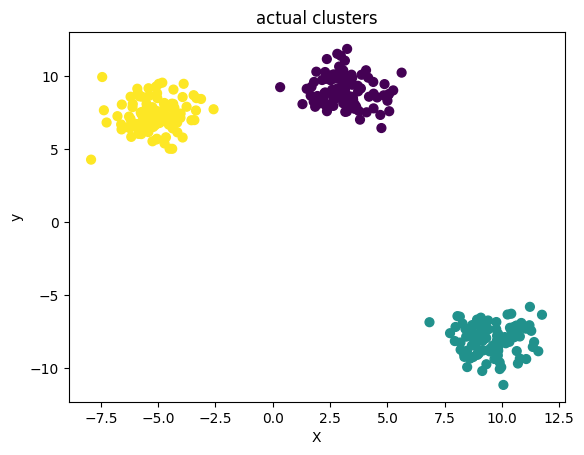

In [ ]:
# plot The correct cluster of data
plt.scatter(X1[:,0], X1[:,1], c=y1,s=40)
plt.title('actual clusters')
plt.xlabel("X")
plt.ylabel("y")

<ipython-input-11-bdeb32b18ff5>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=60, c='red', cmap='viridis')


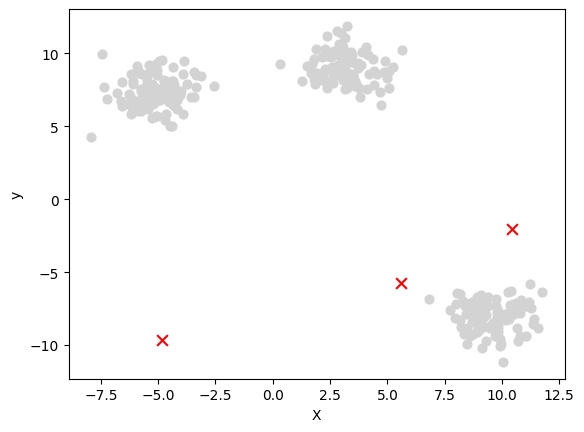

Number of iteration: 1

update the centroid :



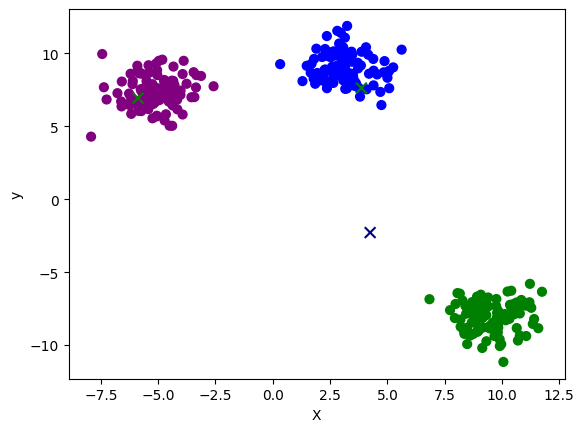


assign point to the clusters :



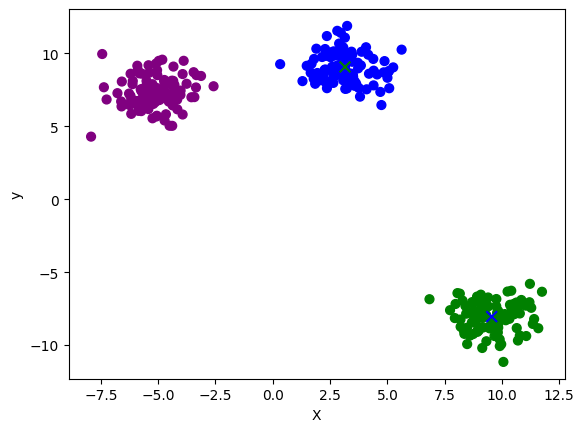

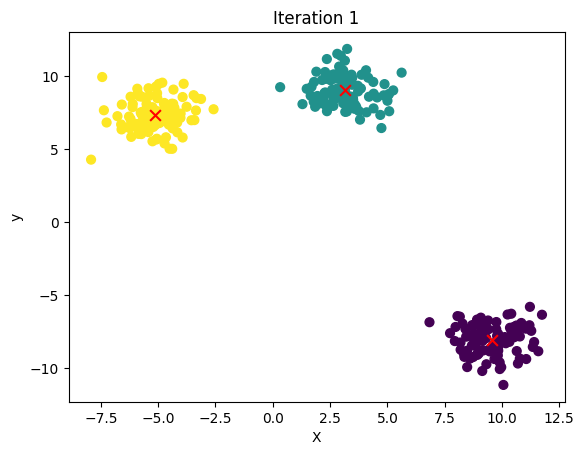

Number of iteration: 2

update the centroid :



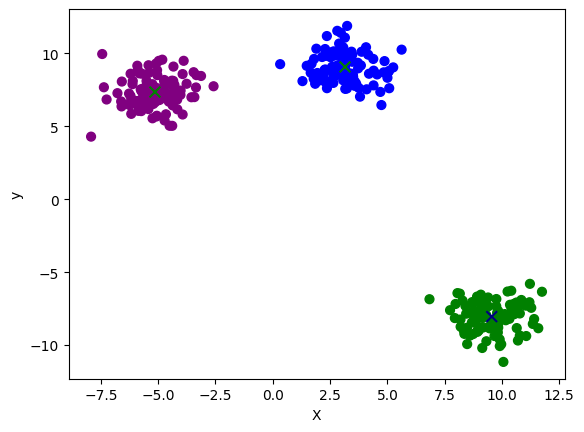


assign point to the clusters :



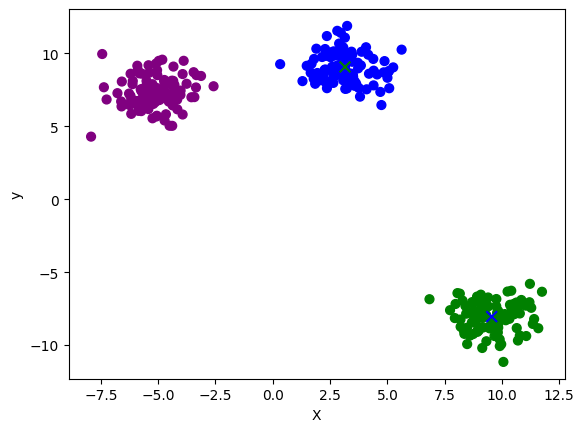

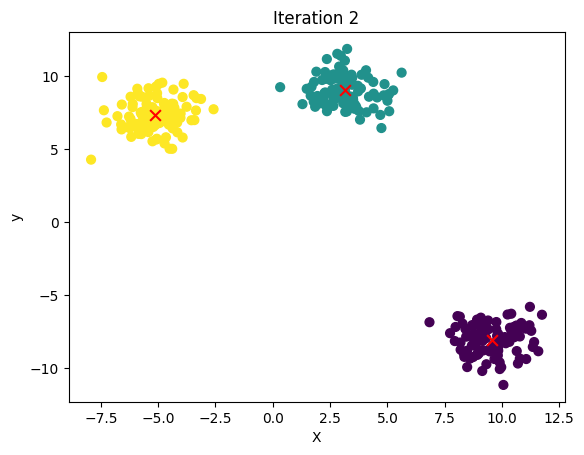

<ipython-input-11-bdeb32b18ff5>:75: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=60, c='red', cmap='viridis')


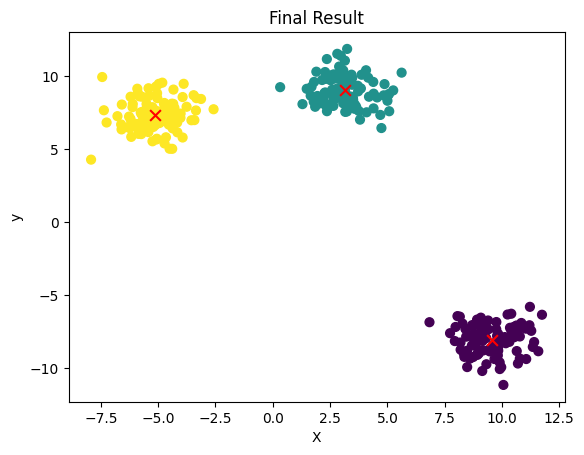

In [ ]:
# Assuming you want to create 3 clusters (you can change the number as needed)
k = 3
t = 10  # Number of iterations

# Call KMeans function with your data
result_KMeans_D1 = KMeans(X1, k, t, y1)

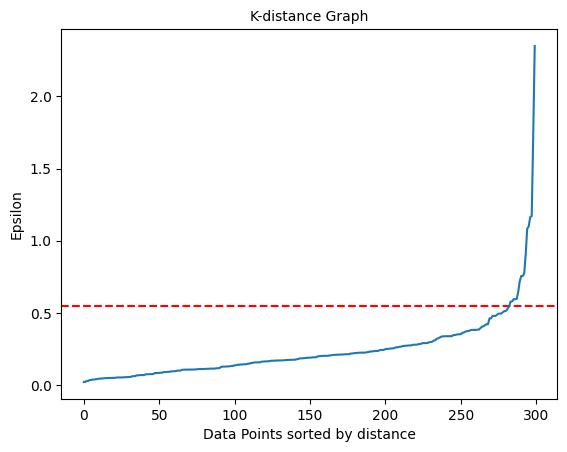

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

neighbors_D1 = NearestNeighbors(n_neighbors=20)
neighbors_fit_D1 = neighbors_D1.fit(X1)
distances_D1, indices_D1 = neighbors_fit_D1.kneighbors(X1)
distances_D1 = np.sort(distances_D1, axis=0)
distances_D1 = distances_D1[:,1]
plt.axhline(y=0.55, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.plot(distances_D1)

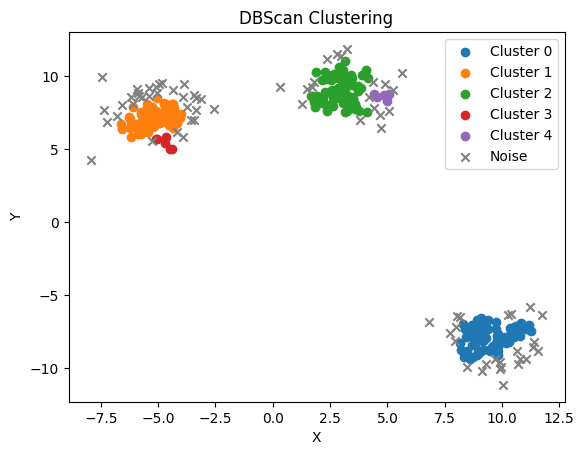

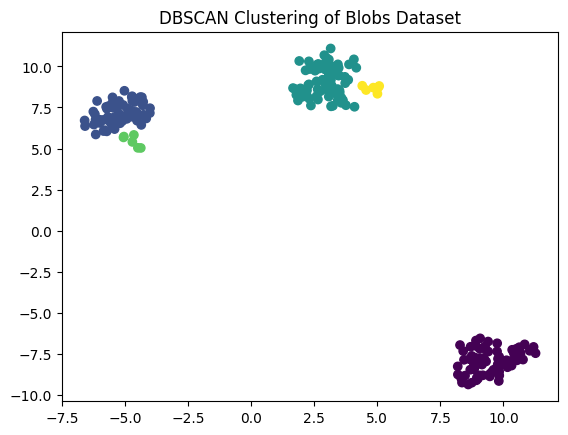

In [ ]:
eps_D1 = 0.51
minPts_D1 = 5
result_dbscan_D1= DBSCAN(eps_D1,minPts_D1,X1)
# Plot the results
plt.scatter(X1[:, 0], X1[:, 1], c=result_dbscan_D1, cmap='viridis')
plt.title('DBSCAN Clustering of Blobs Dataset')
plt.show()

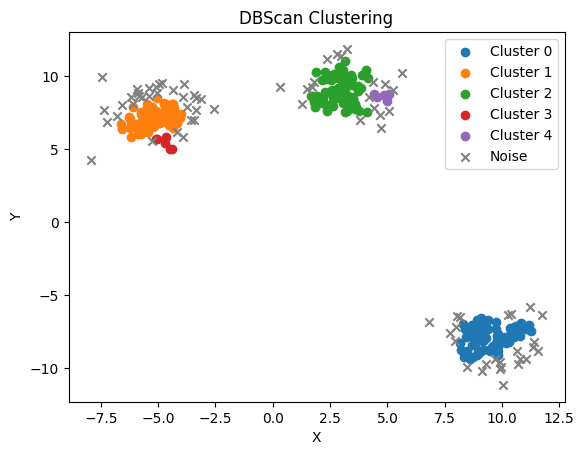

Unique labels: [1 2 3 4 5]


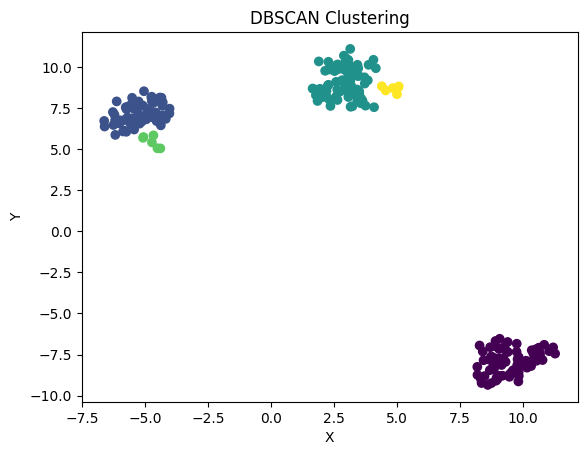

In [ ]:
# Apply DBSCAN and visualize clusters
make_fit(X1, eps_D1, minPts_D1)

# **The Accuracy D1 (K-Means):**

* F1 score

In [ ]:
FM_Kmean_D1 = f1_score(y1, result_KMeans_D1, average='macro')
FM_Kmean_D1

0.3333333333333333

* Normalized mutual information.

In [ ]:
NMI_Kmean_D1 = normalized_mutual_info_score(y1, result_KMeans_D1)
NMI_Kmean_D1

1.0

* Rand Statistic

In [ ]:
RS_Kmean_D1 = rand_score(y1, result_KMeans_D1)
RS_Kmean_D1

1.0

# **The Accuracy D1 (DBSCAN):**

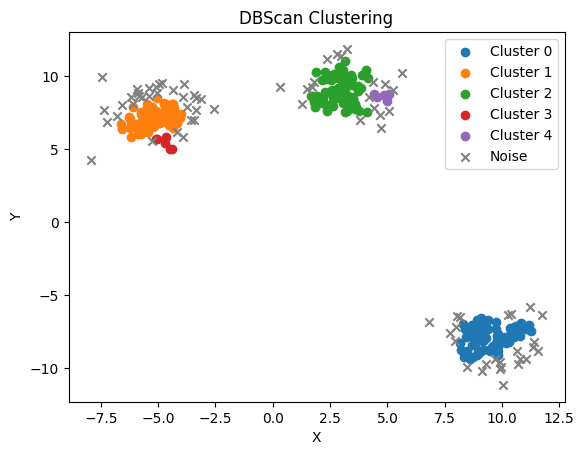

Unique labels: [1 2 3 4 5]


In [ ]:
X1, true_labels = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

# Apply your custom DBSCAN
labels = DBSCAN(eps_D1, minPts_D1, X1)

# Replace None values with a specific integer (e.g., -1)
labels = [label if label is not None else -1 for label in labels]

# Convert labels to integers
labels_int = np.asarray(labels, dtype=int)

# Filter out None values from labels before calling np.unique
unique_labels = np.unique([label for label in labels if label != -1])
print("Unique labels:", unique_labels)

* F1 score

In [ ]:
FM_DBscan_d1 = f1_score(true_labels, labels_int, average='weighted')
print(f"F1 measure: {FM_DBscan_d1}")

F1 measure: 0.5408583186360963


* Normalized mutual information.

In [ ]:
# Evaluate clustering using Normalized Mutual Information (NMI)
nmi_DBscan1 = normalized_mutual_info_score(true_labels, labels_int)
print(f"Normalized Mutual Information (NMI): {nmi_DBscan1}")

Normalized Mutual Information (NMI): 0.6299905605683238


* Rand Statistic

In [ ]:
# Evaluate clustering using Rand Score
rand_score_DBscan1 = rand_score(true_labels, labels_int)
print(f"Rand Score: {rand_score_DBscan1}")

Rand Score: 0.8150501672240803


In [ ]:
#compare the results
print("result_KMeans:", result_KMeans_D1)
print("result_dbscan:", result_dbscan_D1)

result_KMeans: [0 2 2 1 2 1 0 0 0 0 0 2 0 0 1 0 0 1 1 2 2 0 0 2 1 2 0 0 0 2 1 0 1 1 1 2 0
 0 2 0 2 0 2 0 1 1 1 2 2 2 1 1 2 2 0 0 2 0 0 2 1 2 0 0 1 1 1 0 1 1 2 1 2 0
 0 2 2 2 0 0 0 1 0 0 0 2 0 1 1 0 2 2 1 0 2 1 0 1 2 2 2 2 0 2 2 1 0 2 1 2 0
 1 2 1 1 0 1 2 1 2 0 1 2 2 2 1 0 0 2 1 2 0 0 2 2 1 2 1 2 1 2 1 1 0 1 1 2 1
 1 1 2 1 1 2 1 1 1 2 0 2 0 2 2 2 1 2 2 0 0 0 2 1 1 0 1 2 0 1 2 0 2 1 0 0 1
 1 0 1 1 2 2 1 0 1 2 1 0 1 1 0 0 1 2 1 2 2 2 1 0 0 0 0 0 2 1 2 2 1 0 0 0 1
 1 1 0 2 2 2 2 0 0 0 0 1 0 2 2 0 0 1 2 2 0 1 0 1 2 2 1 0 0 2 1 1 2 0 1 0 1
 2 2 2 0 2 1 0 2 1 1 0 2 2 1 1 2 2 1 0 1 2 1 1 0 2 1 1 0 0 0 2 2 0 0 0 1 1
 0 0 1 1]
result_dbscan: [1, None, 2, 5, 2, 3, 1, 1, 1, None, 1, 2, 1, None, 3, 1, 1, 3, None, 4, 4, 1, 1, None, 3, 2, None, 1, None, 2, None, 1, 3, 3, 3, None, 1, 1, None, None, None, None, 2, None, 3, 3, 3, 2, 4, 2, 3, 3, 2, 2, 1, None, None, 1, None, 2, None, 2, 1, 1, 3, 3, 3, 1, None, 3, None, 3, 2, 1, 1, 2, None, 2, 1, 1, None, None, 1, 1, 1, 2, None, 3, 3, 1, None, None, 3, 1,

**K-Means:**

* K-means partition the blobs into three clusters based on their
 means.
* The clusters may resemble circular shapes, as k-means assumes clusters with similar variance and size.

**DBSCAN:**
* DBSCAN identify dense regions and may find multiple clusters within the blobs.
* Cluster sizes may vary, and some data points classified as noise or outliers.

# **Dataset2: Anisotropicly distributed datase**




In [ ]:
X2, _ = datasets.make_blobs(n_samples=n_samples,random_state=random_state)

In [ ]:
# Generate Dataset2 with anisotropic transformation
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X2 = np.dot(X2, transformation)

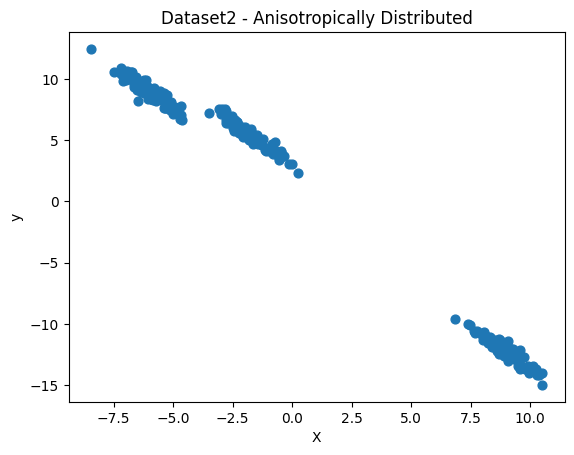

In [ ]:
# Visualize Dataset2
plt.scatter(X2[:, 0], X2[:, 1], s=40)
plt.title('Dataset2 - Anisotropically Distributed')
plt.xlabel("X")
plt.ylabel("y")
plt.show()


<ipython-input-11-bdeb32b18ff5>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=60, c='red', cmap='viridis')


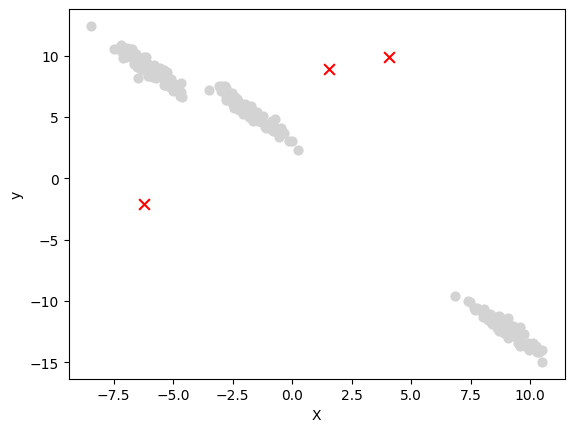

Number of iteration: 1

update the centroid :



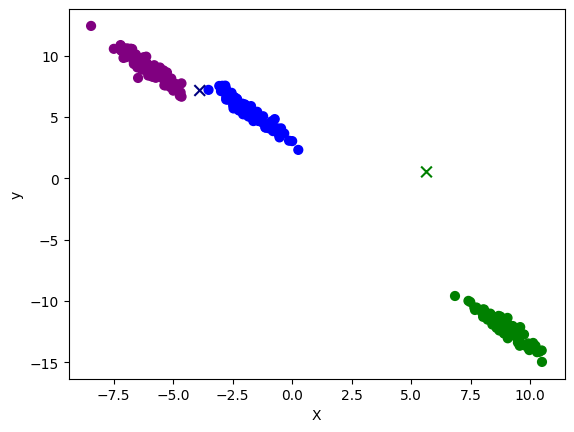


assign point to the clusters :



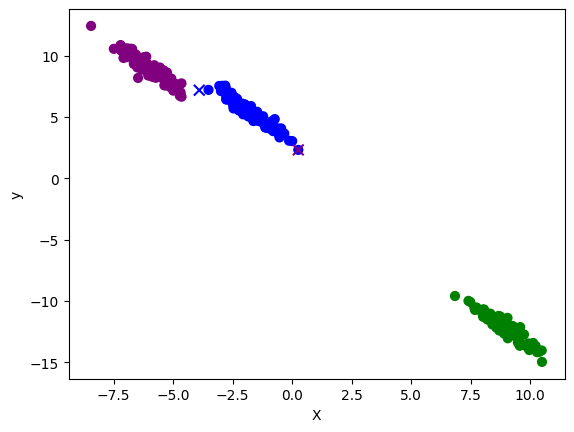

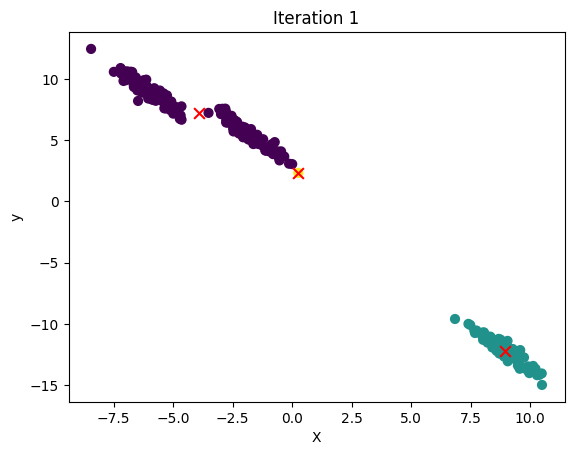

Number of iteration: 2

update the centroid :



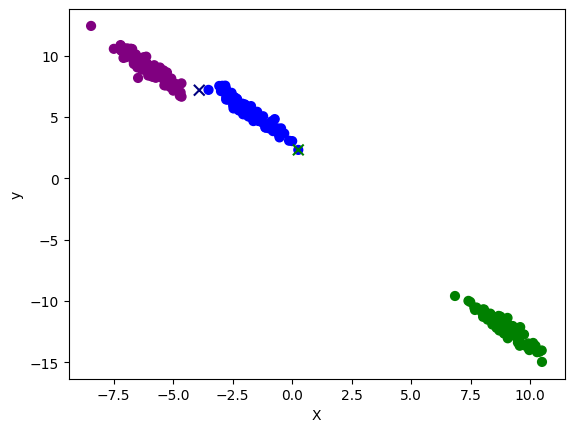


assign point to the clusters :



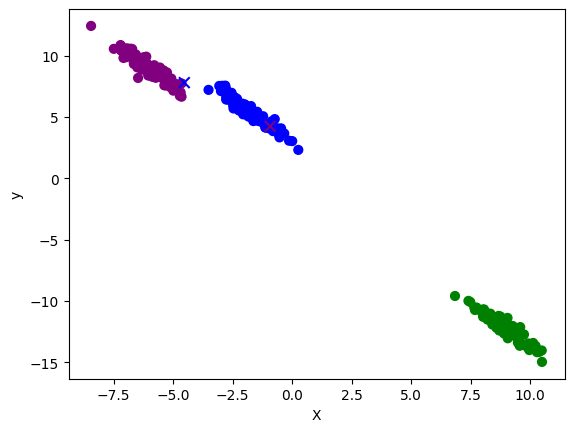

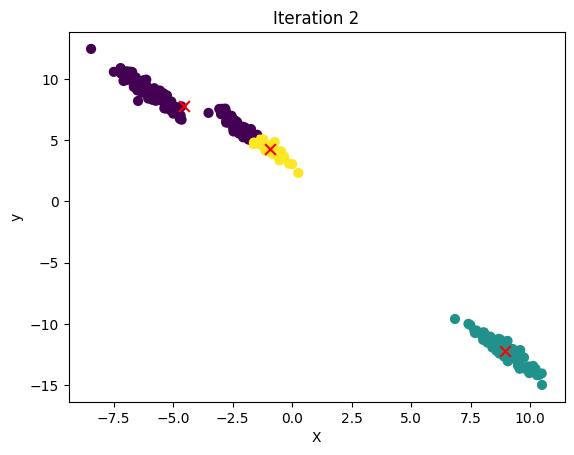

Number of iteration: 3

update the centroid :



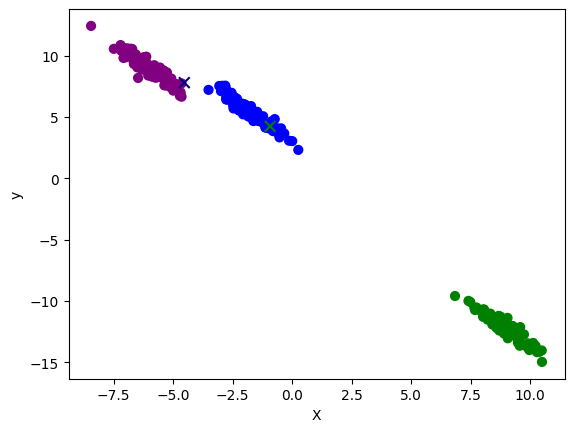


assign point to the clusters :



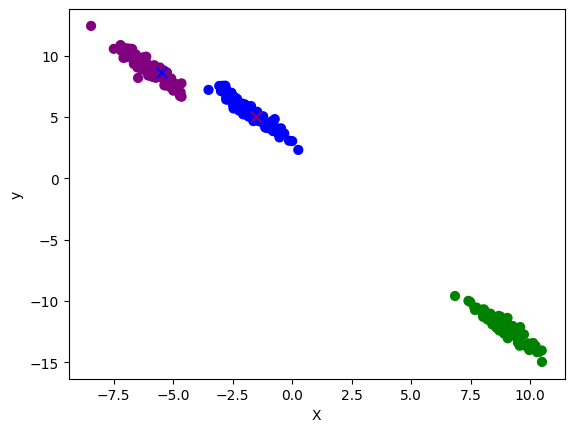

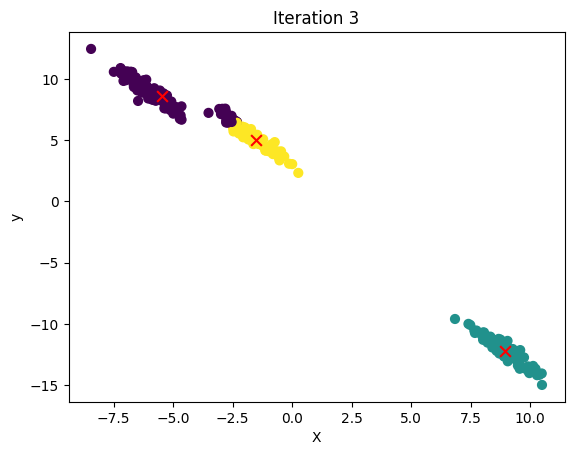

Number of iteration: 4

update the centroid :



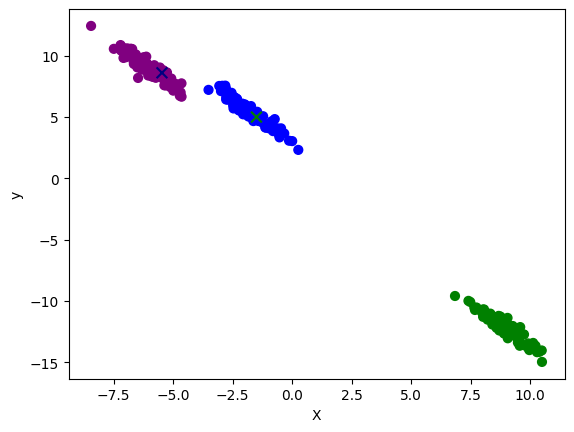


assign point to the clusters :



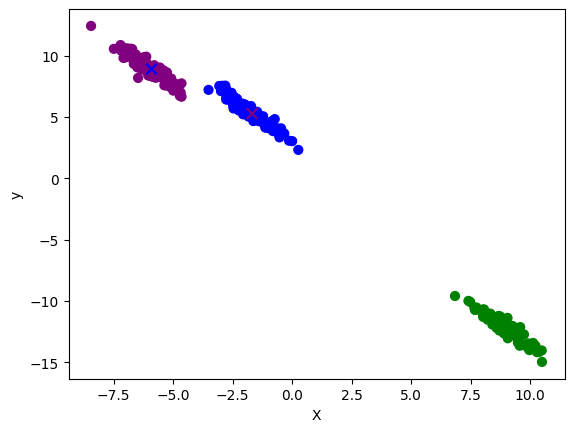

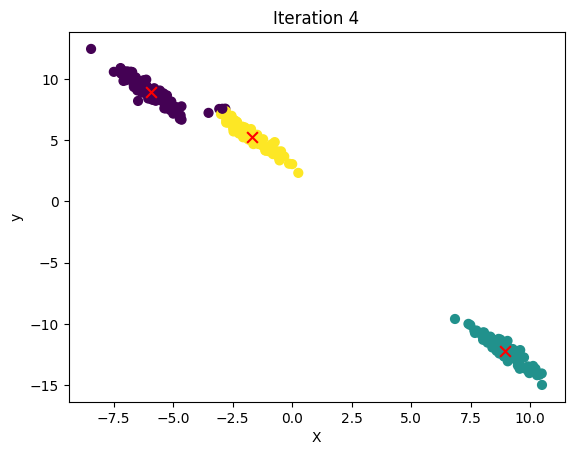

Number of iteration: 5

update the centroid :



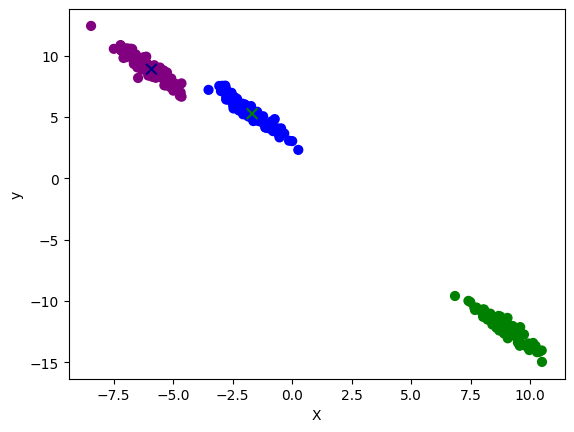


assign point to the clusters :



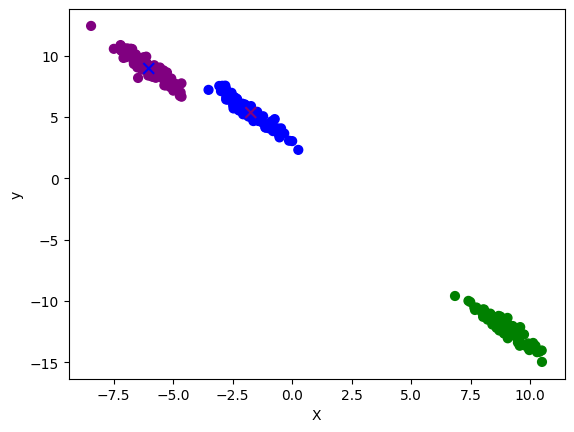

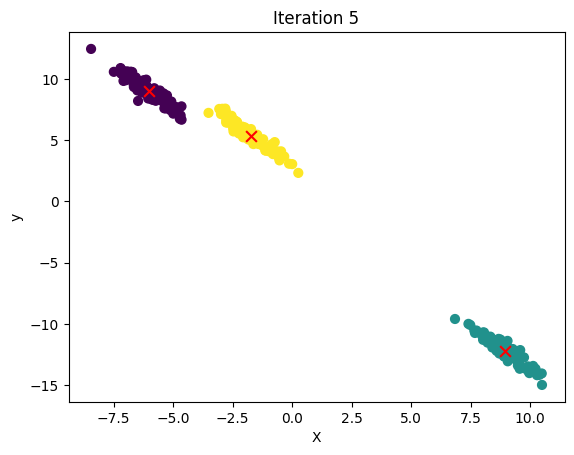

Number of iteration: 6

update the centroid :



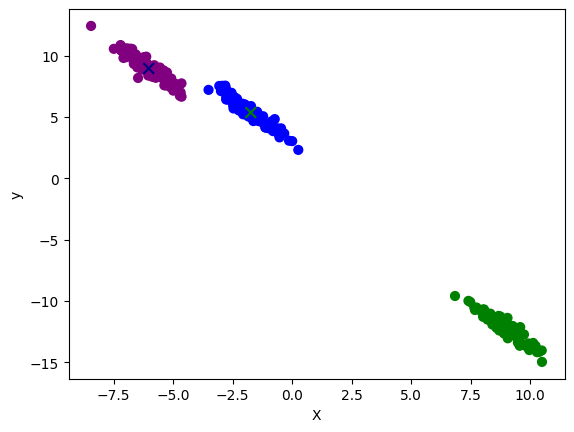


assign point to the clusters :



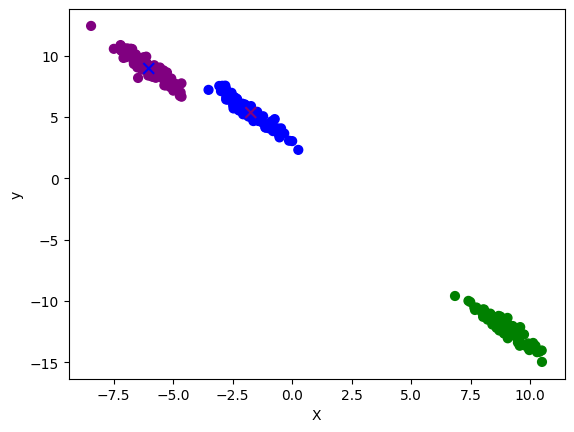

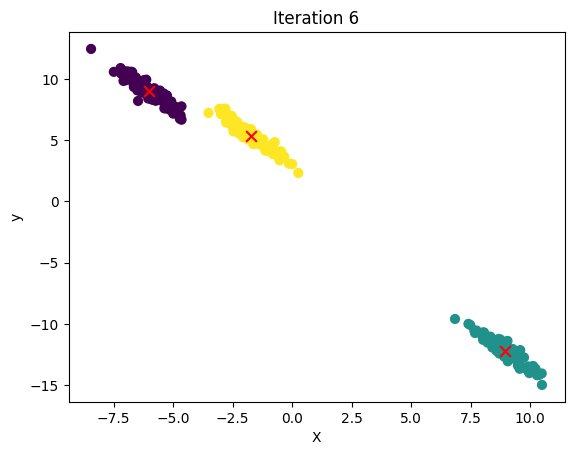

<ipython-input-11-bdeb32b18ff5>:75: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=60, c='red', cmap='viridis')


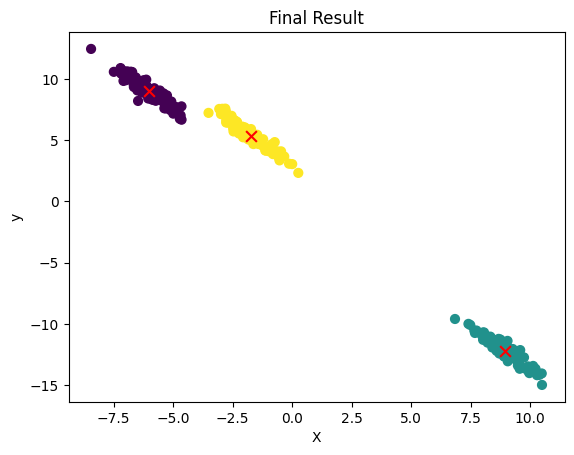

In [ ]:
# K-Means on Dataset2
k=3
# actual Cluster
y2 = _
result_KMeans_D2 = KMeans(X2, k, t,_)

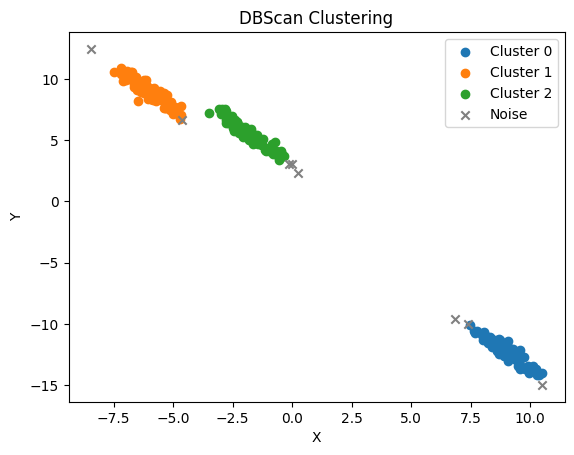

In [ ]:
# Apply DBSCAN on Dataset2
eps_D2 = 0.55
minPts_D2 = 5

# DBSCAN on Dataset2
result_dbscan_D2 = DBSCAN(eps_D2, minPts_D2,X2)


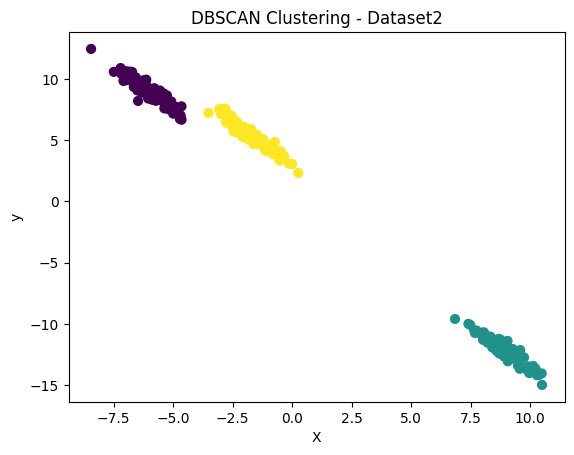

In [ ]:
# Visualize results for Dataset2
plt.scatter(X2[:, 0], X2[:, 1], c=result_KMeans_D2, s=40, cmap='viridis')
plt.title('DBSCAN Clustering - Dataset2')
plt.xlabel("X")
plt.ylabel("y")
plt.show()


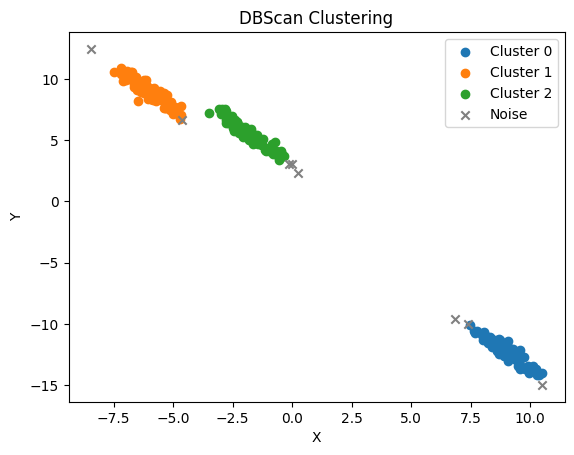

Unique labels: [1 2 3]


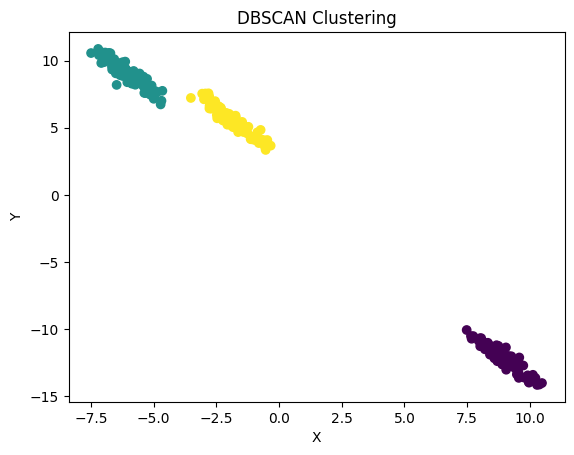

In [ ]:
# Apply DBSCAN and visualize clusters
make_fit(X2, eps_D2, minPts_D2)

# **The Accuracy D2 (K-Means):**

* F-measures

In [ ]:
FM_Kmean_d2 = f1_score(y2, result_KMeans_D2, average='macro')
FM_Kmean_d2

0.3333333333333333

* Normalized mutual information.

In [ ]:
NMI_Kmean_d2 = normalized_mutual_info_score(y2, result_KMeans_D2)
NMI_Kmean_d2

1.0

*  Rand Statistic

In [ ]:
RS_Kmean_d2 = rand_score(y2, result_KMeans_D2)
RS_Kmean_d2

1.0

# **The Accuracy D2 (DBSCAN):**

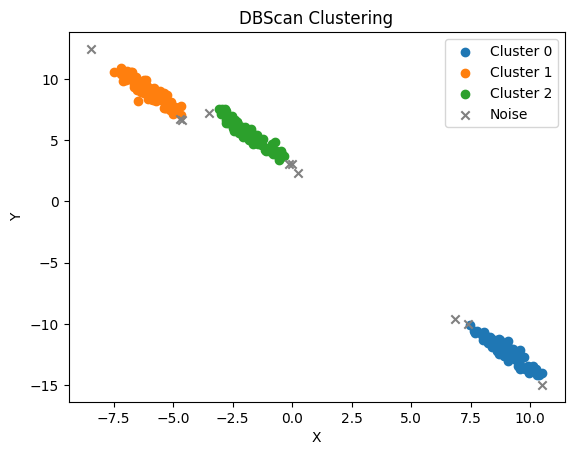

Unique labels for X2: [1 2 3]


In [ ]:
# Apply your custom DBSCAN on the transformed dataset X2
labels_X2 = DBSCAN(eps_D1, minPts_D1, X2)

# Replace None values with a specific integer (e.g., -1)
labels_X2 = [label if label is not None else -1 for label in labels_X2]

# Convert labels to integers
labels_X2_int = np.asarray(labels_X2, dtype=int)
y_true = y1
y_pred = labels_X2_int

# Filter out None values from labels before calling np.unique
unique_labels_X2 = np.unique([label for label in labels_X2 if label != -1])
print("Unique labels for X2:", unique_labels_X2)


* F-measures

In [ ]:
# Calculate F1 score
FM_DBscan_d2 = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score: {FM_DBscan_d2}")

F1 Score: 0.6565143824027072


* Normalized mutual information.

In [ ]:
# Calculate Normalized Mutual Information
nmi_DBscan2 = normalized_mutual_info_score(y_true, y_pred)
print(f"Normalized Mutual Information: {nmi_DBscan2}")

Normalized Mutual Information: 0.9210546635893065


*  Rand Statistic

In [ ]:
# Calculate Rand Score
rand_score_DBscan2 = rand_score(true_labels, labels_int)
print(f"Rand Score: {rand_score_DBscan2}")

Rand Score: 0.8150501672240803


In [ ]:
# Compare results for Dataset2
#compare the results
print("result_KMeans:", result_KMeans_D2)
print("result_dbscan:", result_dbscan_D2)

result_KMeans: [1 0 0 2 0 2 1 1 1 1 1 0 1 1 2 1 1 2 2 0 0 1 1 0 2 0 1 1 1 0 2 1 2 2 2 0 1
 1 0 1 0 1 0 1 2 2 2 0 0 0 2 2 0 0 1 1 0 1 1 0 2 0 1 1 2 2 2 1 2 2 0 2 0 1
 1 0 0 0 1 1 1 2 1 1 1 0 1 2 2 1 0 0 2 1 0 2 1 2 0 0 0 0 1 0 0 2 1 0 2 0 1
 2 0 2 2 1 2 0 2 0 1 2 0 0 0 2 1 1 0 2 0 1 1 0 0 2 0 2 0 2 0 2 2 1 2 2 0 2
 2 2 0 2 2 0 2 2 2 0 1 0 1 0 0 0 2 0 0 1 1 1 0 2 2 1 2 0 1 2 0 1 0 2 1 1 2
 2 1 2 2 0 0 2 1 2 0 2 1 2 2 1 1 2 0 2 0 0 0 2 1 1 1 1 1 0 2 0 0 2 1 1 1 2
 2 2 1 0 0 0 0 1 1 1 1 2 1 0 0 1 1 2 0 0 1 2 1 2 0 0 2 1 1 0 2 2 0 1 2 1 2
 0 0 0 1 0 2 1 0 2 2 1 0 0 2 2 0 0 2 1 2 0 2 2 1 0 2 2 1 1 1 0 0 1 1 1 2 2
 1 1 2 2]
result_dbscan: [1, 2, 2, 3, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, None, 2, 2, 1, 1, 2, 3, 2, 1, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 2, 1, 2, 1, 2, 1, 3, 3, 3, 2, None, 2, 3, 3, 2, 2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 1, 3, 3, 3, 1, 3, 3, 2, 3, 2, 1, 1, 2, 2, 2, 1, 1, None, 3, 1, 1, 1, 2, 1, 3, 3, 1, 2, 2, 3, 1, 2, 3, 1, 3, 2, 2, 2, 2, 1, 2, 2, 3, 1, 2, 3, 2, 1, 3, 2, 3, 3, 1, 3,

**K-Means:**
K-means may partition the anisotropically distributed data into clusters with varying shapes and sizes.


**DBSCAN:**
 DBSCAN may identify clusters within the anisotropically distributed data, and the number of clusters may vary. Some data points may be classified as noise or outliers.

# **Dataset3:  noisy moons dataset**

In [ ]:
X3, y3 = datasets.make_moons(n_samples=n_samples, noise=0.1,random_state=random_state)

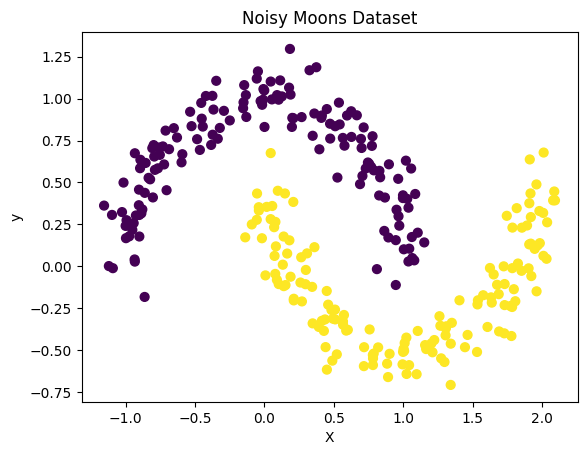

In [ ]:
# plot The Noisy Moons Dataset
plt.scatter(X3[:,0], X3[:,1], c=y3,s=40)
plt.title('Noisy Moons Dataset')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

<ipython-input-11-bdeb32b18ff5>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=60, c='red', cmap='viridis')


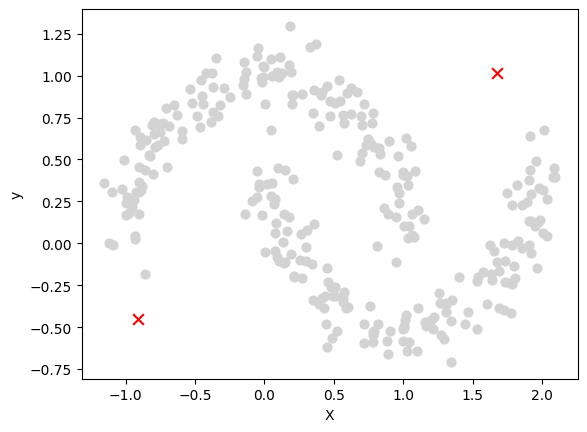

Number of iteration: 1

update the centroid :



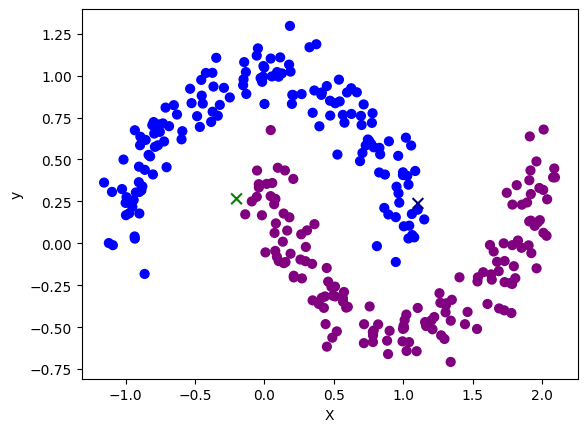


assign point to the clusters :



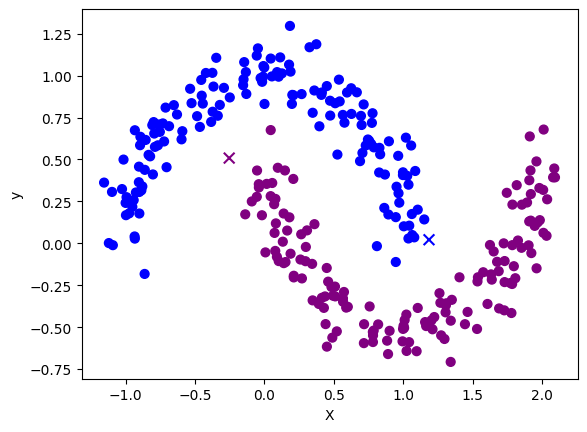

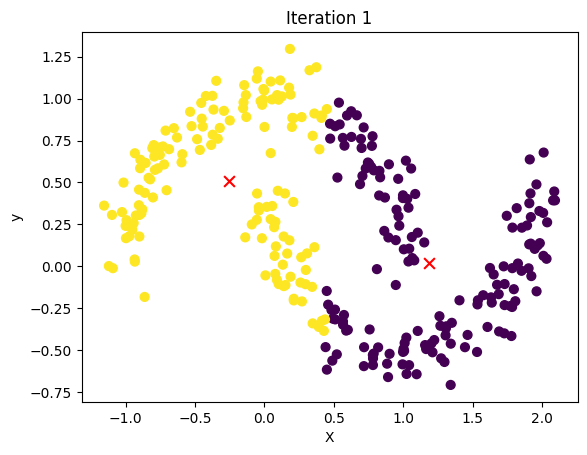

Number of iteration: 2

update the centroid :



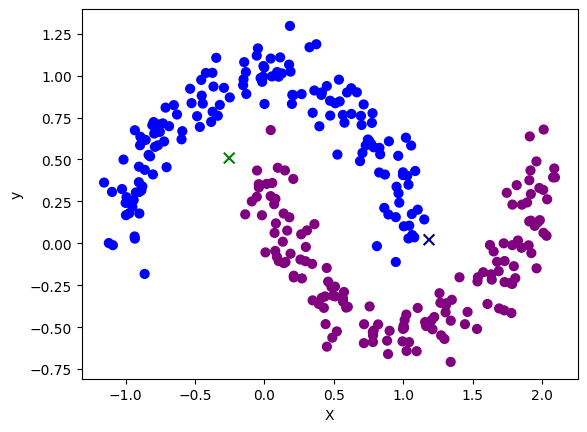


assign point to the clusters :



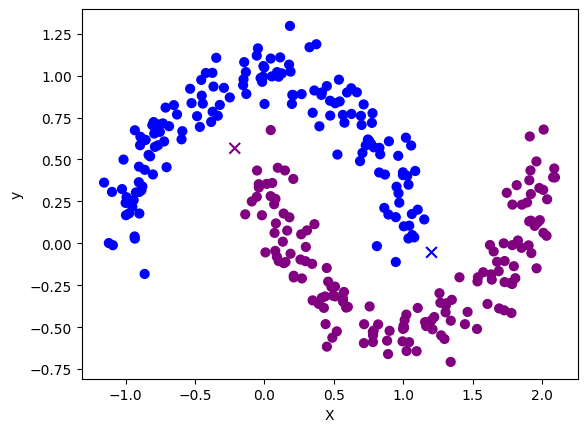

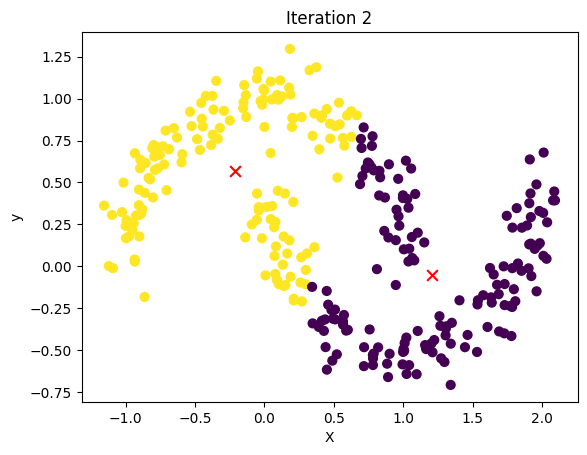

Number of iteration: 3

update the centroid :



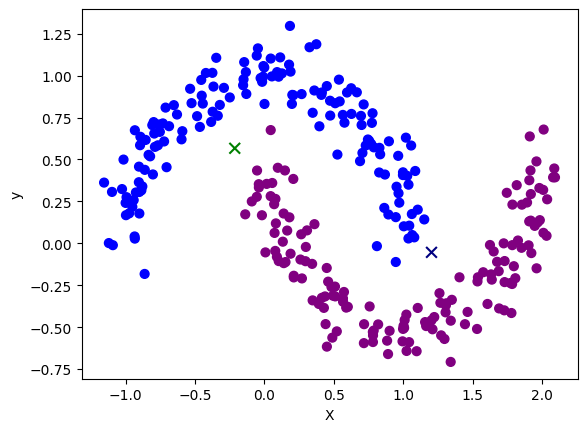


assign point to the clusters :



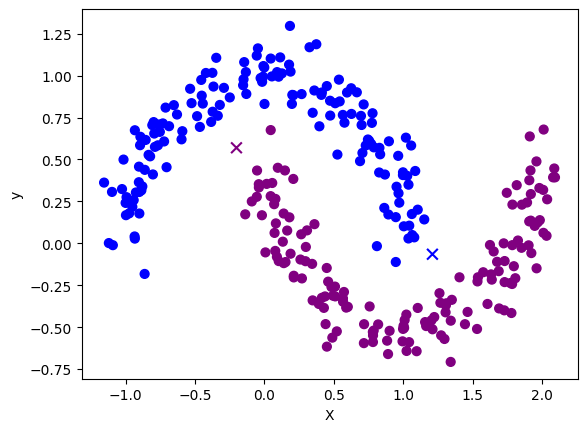

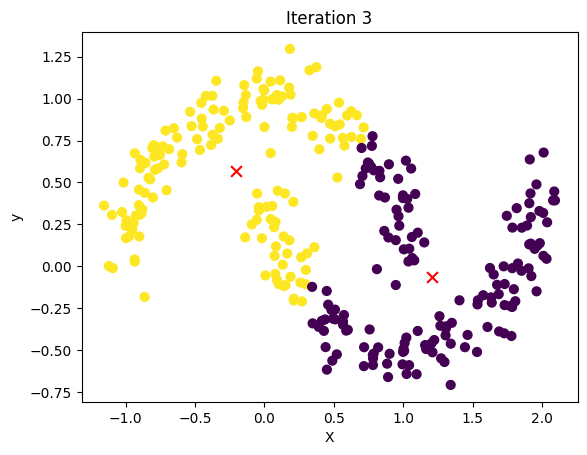

Number of iteration: 4

update the centroid :



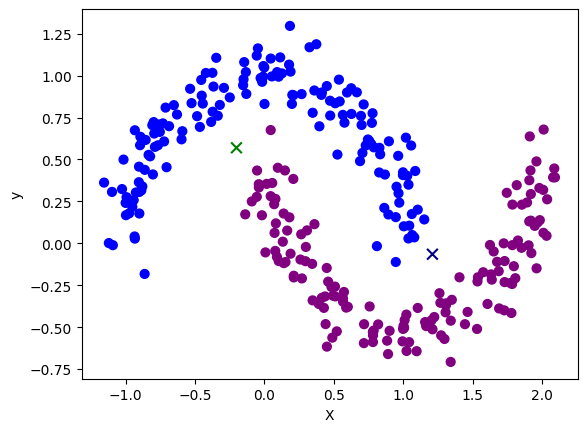


assign point to the clusters :



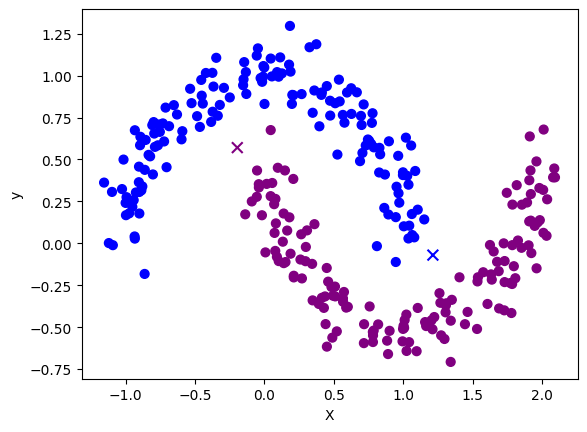

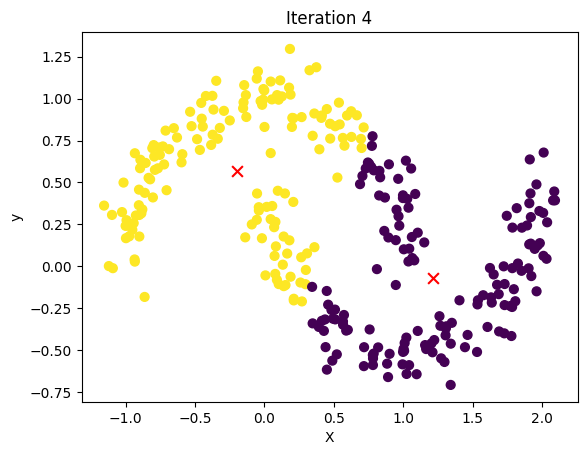

Number of iteration: 5

update the centroid :



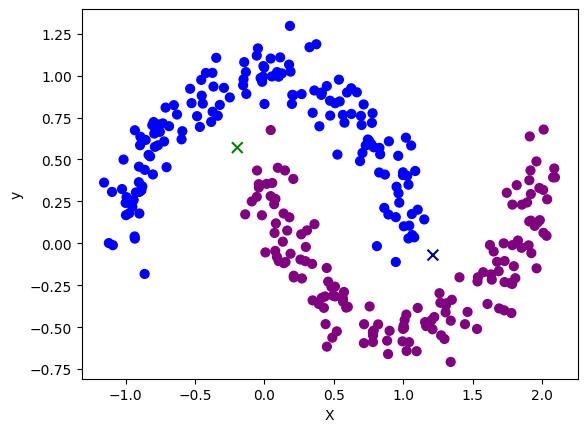


assign point to the clusters :



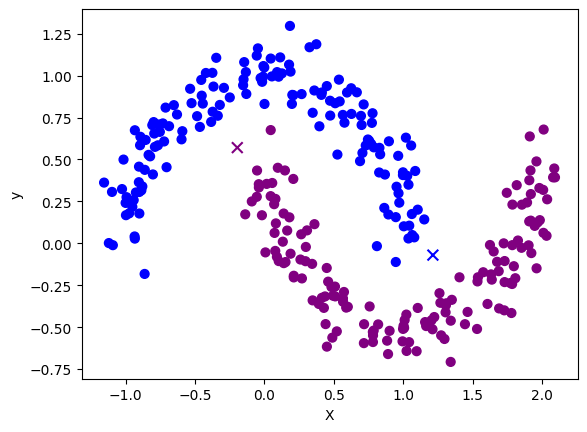

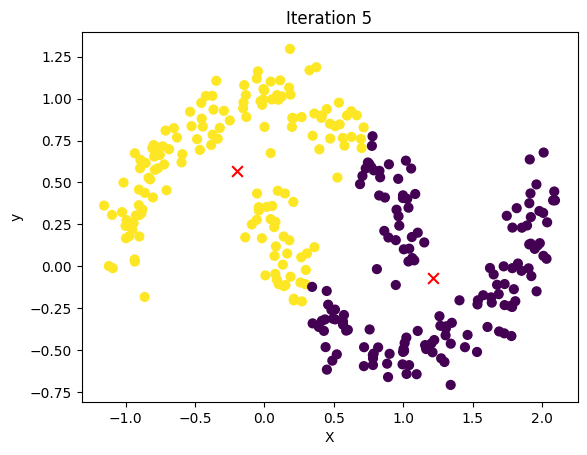

<ipython-input-11-bdeb32b18ff5>:75: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=60, c='red', cmap='viridis')


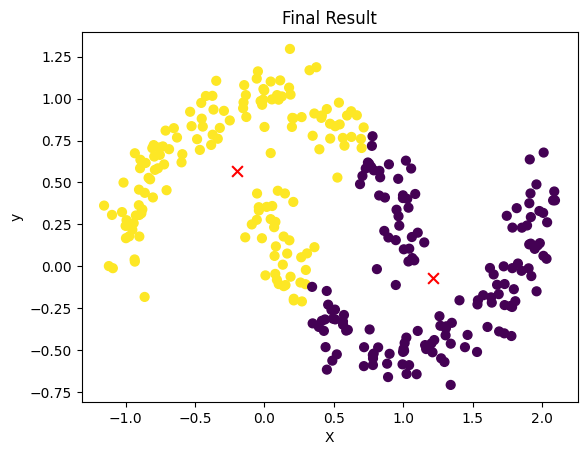

In [ ]:
# apply KMeans function on Noisy Moons Dataset
k=2
result_KMeans_D3 = KMeans(X3, k, t, y3)

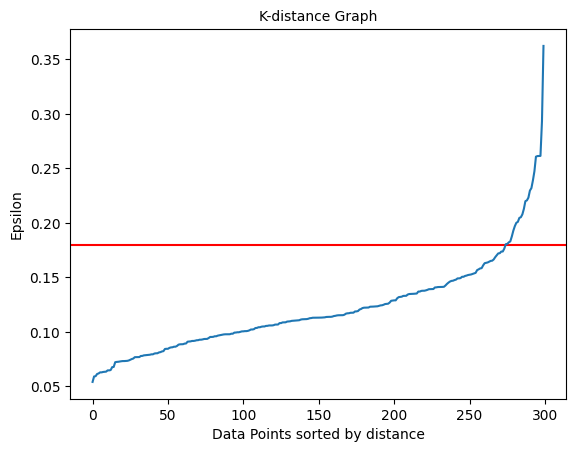

In [ ]:

neighbors_D3 = NearestNeighbors(n_neighbors=20)
neighbors_fit_D3 = neighbors_D3.fit(X3)
distances_D3, indices_D3 = neighbors_fit_D3.kneighbors(X3)
distances_D3 = np.sort(distances_D3, axis=0)
distances_D3 = distances_D3[:,5]
plt.axhline(y=0.18, color='r', linestyle='-')
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.plot(distances_D3)

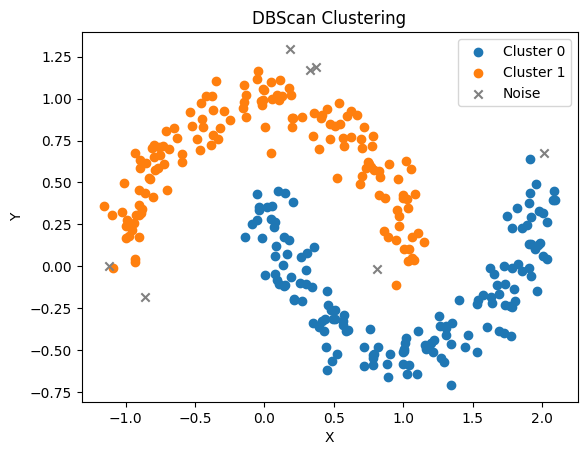

In [ ]:

eps_D3 = 0.18 # based on elbow gragh
minPts_D3 = 4 # minpts=2^dim = 2^2=4

# Apply DBSCAN on Noisy Moons Dataset
result_dbscan_D3 = DBSCAN(eps_D3, minPts_D3,X3)


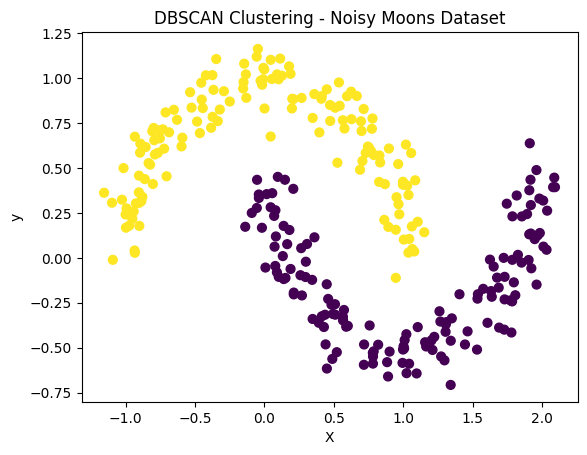

In [ ]:
# Visualize results for Noisy Moons Dataset
plt.scatter(X3[:, 0], X3[:, 1], c=result_dbscan_D3, s=40, cmap='viridis')
plt.title('DBSCAN Clustering - Noisy Moons Dataset')
plt.xlabel("X")
plt.ylabel("y")
plt.show()


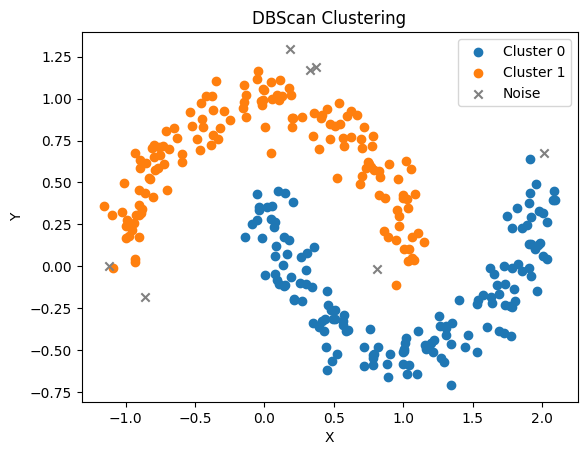

Unique labels: [1 2]


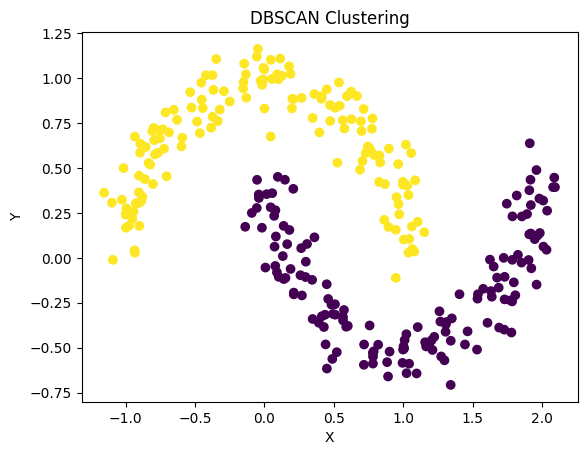

In [ ]:
make_fit(X3, eps_D3, minPts_D3)

# **The Accuracy D3 (K-Means):**

*  F-measures

In [ ]:
FM_Kmean_d3 = f1_score(y3, result_KMeans_D3, average='macro')
FM_Kmean_d3

0.25333333333333335

* Normalized mutual information.

In [ ]:
NMI_Kmean_d3 = normalized_mutual_info_score(y3, result_KMeans_D3)
NMI_Kmean_d3

0.18348128804617167

* Rand Statistic

In [ ]:
RS_Kmean_d3 = rand_score(y3, result_KMeans_D3)
RS_Kmean_d3

0.6204236343366778

# **The Accuracy D3 (DBSCAN):**

*  F-measures

In [ ]:
# Calculate F1 score
FM_DBscan_d3 = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score: {FM_DBscan_d3}")

F1 Score: 0.6565143824027072


* Normalized mutual information.

In [ ]:
# Calculate Normalized Mutual Information
nmi_DBscan3 = normalized_mutual_info_score(y_true, y_pred)
print(f"Normalized Mutual Information: {nmi_DBscan3}")

Normalized Mutual Information: 0.9210546635893065


* Rand Statistic

In [ ]:
# Calculate Rand Score
rand_score_DBscan3 = rand_score(y_true, y_pred)
print(f"Rand Score: {rand_score_DBscan3}")

Rand Score: 0.9777257525083612


In [ ]:
#compare the results
print("result_KMeans:", result_KMeans_D3)
print("result_dbscan:", result_dbscan_D3)

result_KMeans: [0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0
 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0
 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0
 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1
 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1
 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1
 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0
 0 0 1 0]
result_dbscan: [1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, None, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, None, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, None, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1,

K-means:

-K-means struggle with the Noisy Moons Dataset because the clusters have a **non-spherical shape and varying densities**.

-It **incorrectly** assign points to clusters .

DBSCAN:

-DBSCAN is well-suited for the Noisy Moons Dataset as it can effectively **handle datasets with complex shapes and varying densities**.

-It can **accurately identify the moon-shaped** clusters and clusters of arbitrary shapes differentiate them from the noisy points.
it a **suitable choice for Noisy Moons Dataset**.


# **Dataset4: noisy circles dataset**


In [ ]:
#noisy circles dataset
X4,y4 = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05,random_state=random_state)

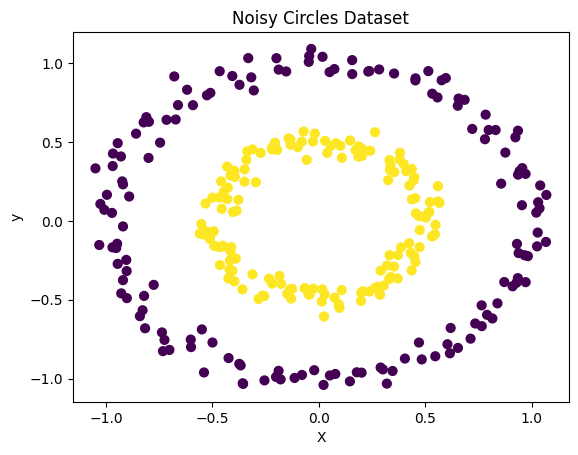

In [ ]:
# plot The correct cluster of data
plt.scatter(X4[:,0], X4[:,1], c=y4,s=40)
plt.title('Noisy Circles Dataset')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

<ipython-input-11-bdeb32b18ff5>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=60, c='red', cmap='viridis')


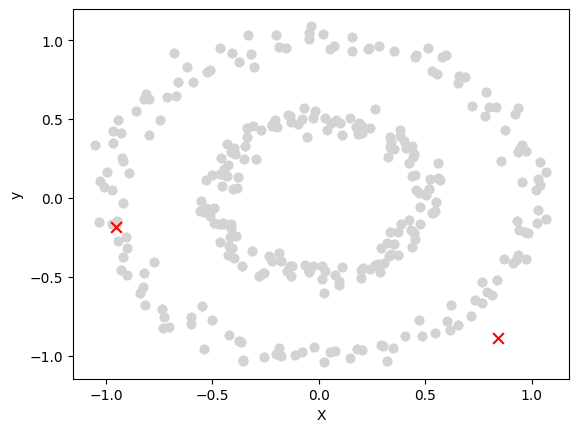

Number of iteration: 1

update the centroid :



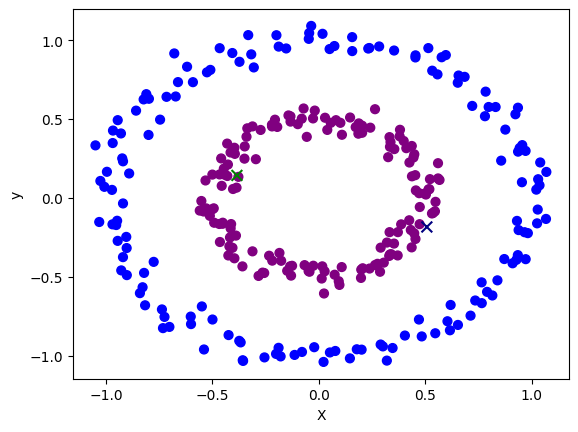


assign point to the clusters :



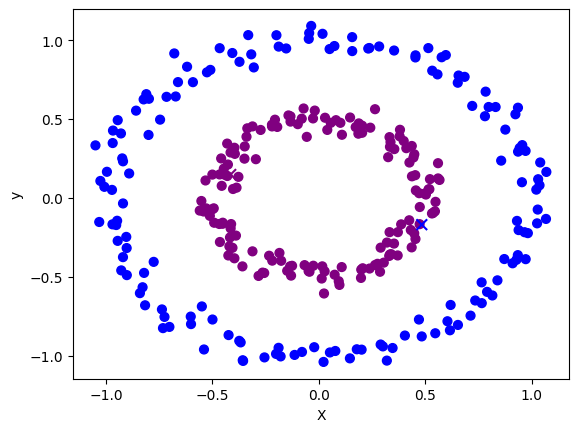

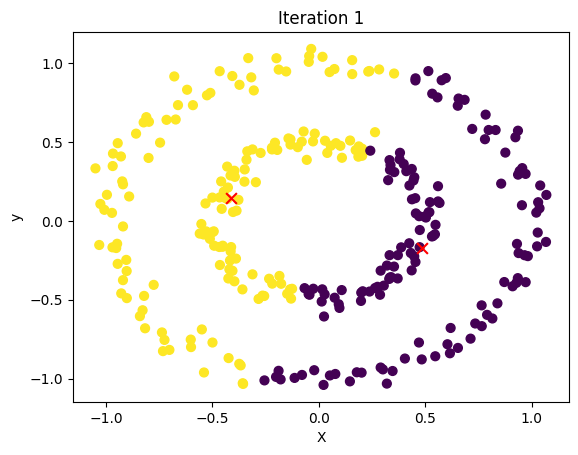

Number of iteration: 2

update the centroid :



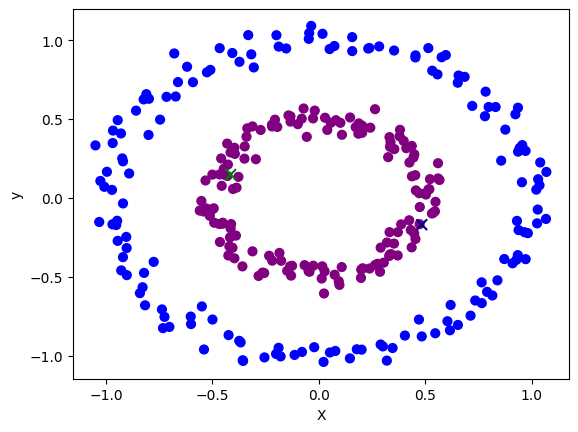


assign point to the clusters :



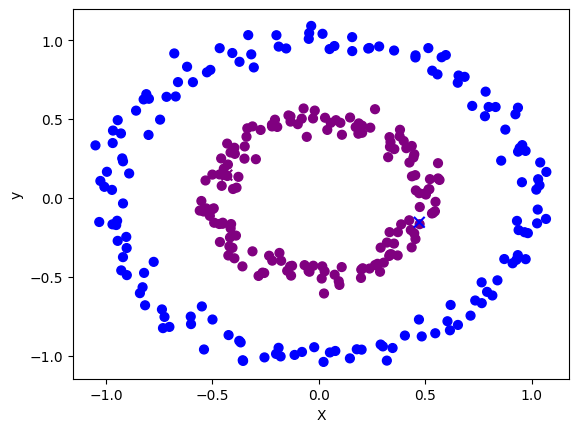

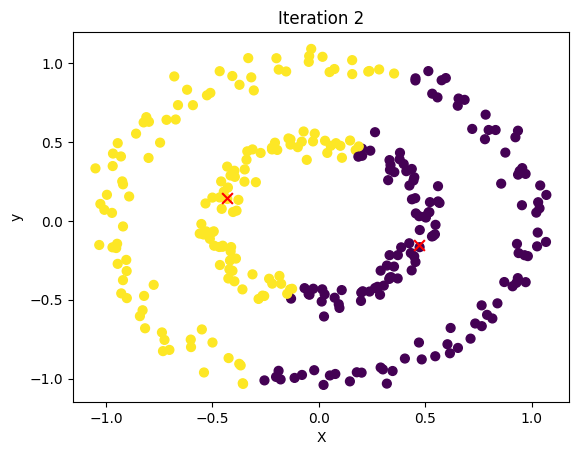

Number of iteration: 3

update the centroid :



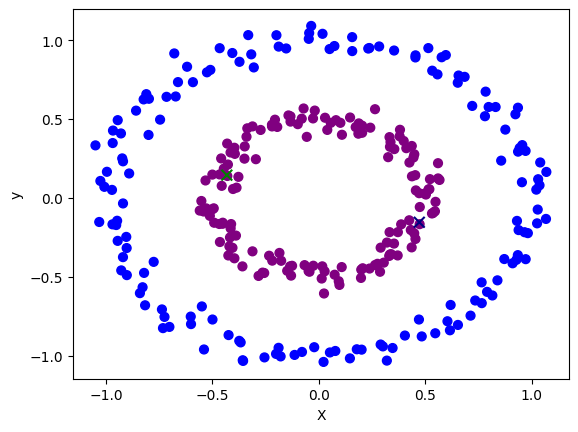


assign point to the clusters :



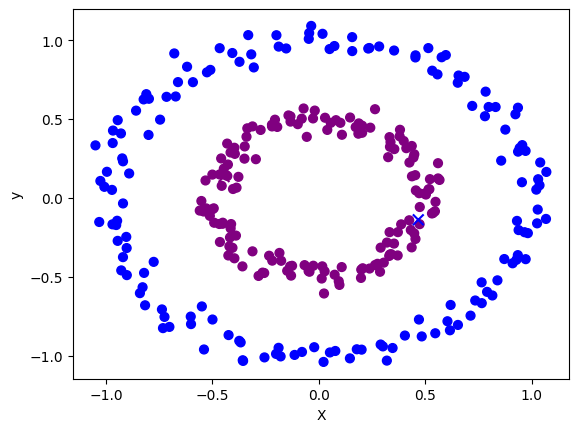

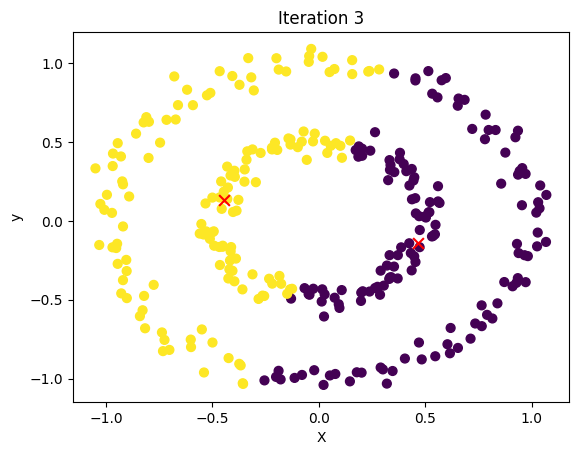

Number of iteration: 4

update the centroid :



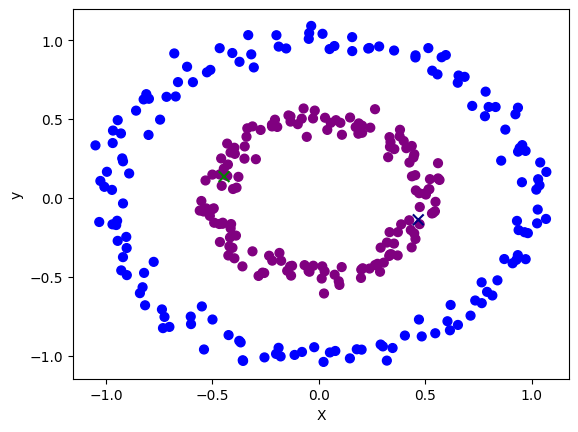


assign point to the clusters :



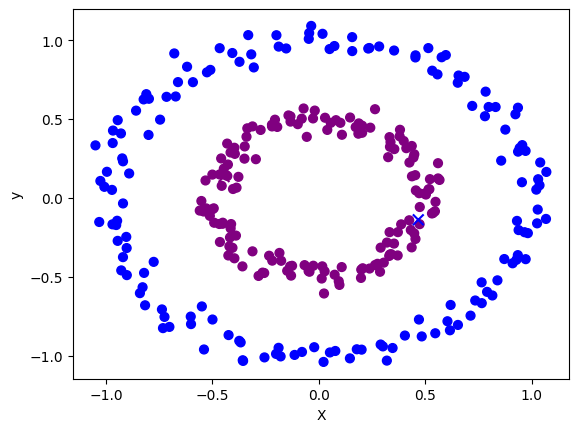

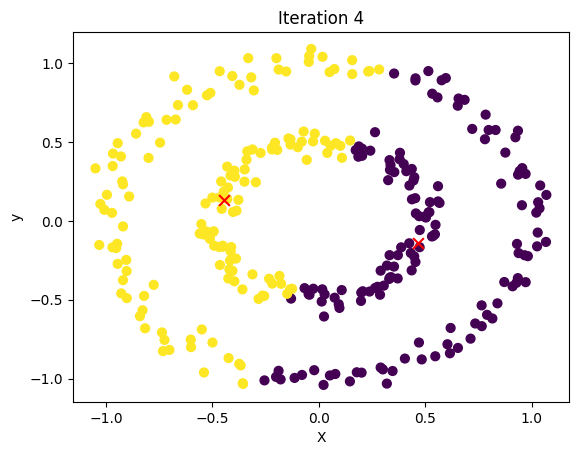

<ipython-input-11-bdeb32b18ff5>:75: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=60, c='red', cmap='viridis')


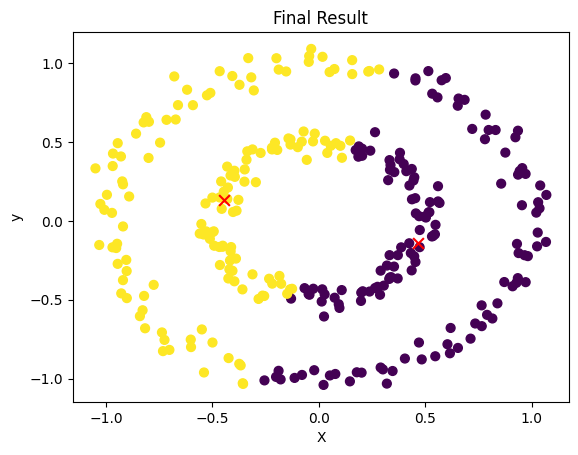

In [ ]:
k=2

# apply KMeans function on noisy circles dataset
result_KMeans_D4 = KMeans(X4, k, t, y4)

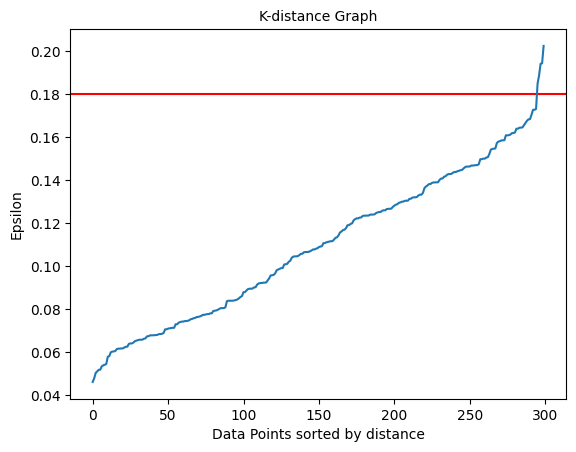

In [ ]:
neighbors_D4 = NearestNeighbors(n_neighbors=10)
neighbors_fit_D4 = neighbors_D4.fit(X4)
distances_D4, indices_D4 = neighbors_fit_D4.kneighbors(X4)
distances_D4 = np.sort(distances_D4, axis=0)
distances_D4 = distances_D4[:,5]
plt.axhline(y=0.18, color='r', linestyle='-')
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.plot(distances_D4)

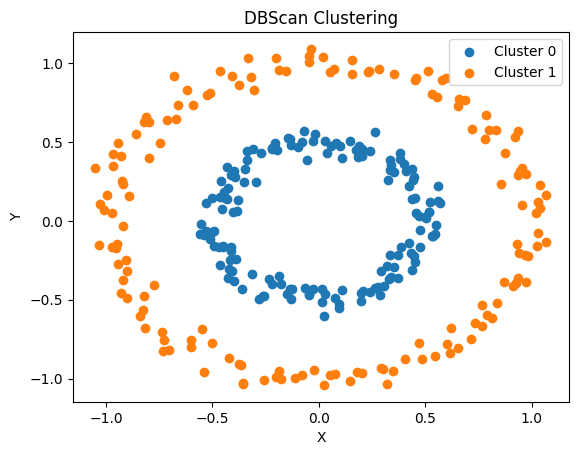

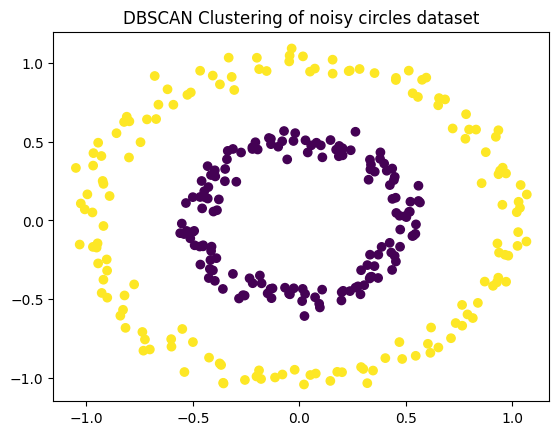

In [ ]:
eps_D4 = 0.18 # based on elbow gragh
minPts_D4 = 4 # minpts=2^dim = 2^2=4


# DBSCAN on  noisy circles dataset
result_dbscan_D4 = DBSCAN(eps_D4, minPts_D4,X4)
# Plot the results
plt.scatter(X4[:, 0], X4[:, 1], c=result_dbscan_D4, cmap='viridis')
plt.title('DBSCAN Clustering of noisy circles dataset')
plt.show()


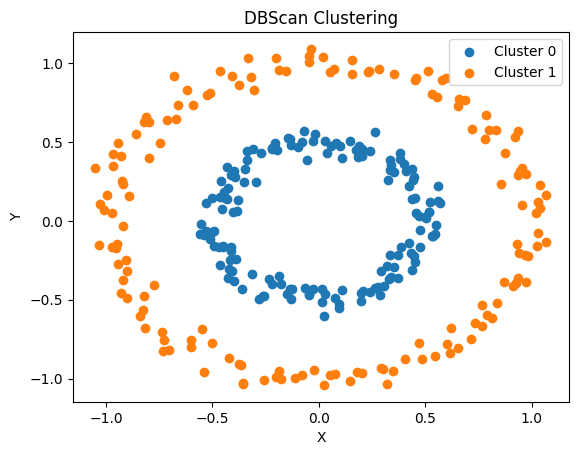

Unique labels: [1 2]


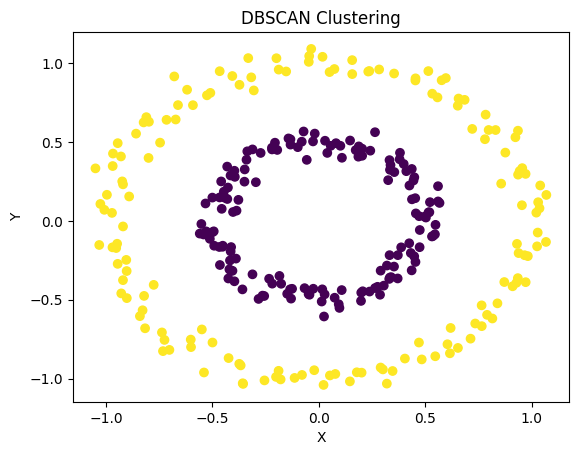

In [ ]:
make_fit(X4,eps_D4,minPts_D4)

# **The Accuracy D4 (K-Means):**

* F-measures

In [ ]:
FM_Kmean_d4 = f1_score(y4, result_KMeans_D4, average='macro')
FM_Kmean_d4

0.4999777767900796

* Normalized mutual information.

In [ ]:
NMI_Kmean_d4 = normalized_mutual_info_score(y4, result_KMeans_D4)
NMI_Kmean_d4

6.407263852149519e-16

* Rand Statistic

In [ ]:
RS_Kmean_d4 = rand_score(y4,result_KMeans_D4)
RS_Kmean_d4

0.4983277591973244

# **The Accuracy D4 (DBSCAN):**

* F-measures

In [ ]:
# Calculate F1 score
FM_DBscan_d4 = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score: {FM_DBscan_d4}")

F1 Score: 0.6565143824027072


* Normalized mutual information.

In [ ]:
# Calculate Normalized Mutual Information
nmi_DBscan4 = normalized_mutual_info_score(y_true, y_pred)
print(f"Normalized Mutual Information: {nmi_DBscan4}")

Normalized Mutual Information: 0.9210546635893065


* Rand Statistic

In [ ]:
# Calculate Rand Score
rand_score_DBscan4 = rand_score(y_true, y_pred)
print(f"Rand Score: {rand_score_DBscan4}")

Rand Score: 0.9777257525083612


In [ ]:
#compare the results
print("result_KMeans:", result_KMeans_D4)
print("result_dbscan:", result_dbscan_D4)

result_KMeans: [1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1
 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0
 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1
 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1
 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0
 0 1 0 1]
result_dbscan: [1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1,

K-means:

-K-means struggle with the Noisy Circles Dataset as the clusters have non-linear shapes.

-It assumes **spherical clusters**, which result in inaccurate clustering and assigning points to incorrect clusters.

-K-means is **sensitive to noise and outliers**, which can further affect its performance on this dataset.

DBSCAN:

-DBSCAN is **suitable for the Noisy Circles Dataset** as it can handle datasets with non-linear cluster shapes.

-It can effectively identify the circular clusters and **differentiate them from the noisy points.**
DBSCAN  is a good choice for this dataset.

**Comparing** **results**

In [ ]:
import pandas as pd
from IPython.display import display

# Initialize data for the table
data = {
    'Algorithm': ['Kmeans', 'DBSCAN','Kmeans', 'DBSCAN', 'Kmeans', 'DBSCAN', 'Kmeans', 'DBSCAN'],
    'Dataset': ['Dataset 1','Dataset 1', 'Dataset 2','Dataset 2','Dataset 3','Dataset 3','Dataset 4','Dataset 4'],
    'F-Measure': [FM_Kmean_D1,FM_DBscan_d1,FM_Kmean_d2,FM_DBscan_d2,FM_Kmean_d3,FM_DBscan_d3,FM_Kmean_d4,FM_DBscan_d4],
    'NMI': [NMI_Kmean_D1,nmi_DBscan1, NMI_Kmean_d2,nmi_DBscan2,NMI_Kmean_d3,nmi_DBscan3,NMI_Kmean_d4,nmi_DBscan4],
    'Rand Score': [RS_Kmean_D1,rand_score_DBscan1,RS_Kmean_d2,rand_score_DBscan2,RS_Kmean_d3,rand_score_DBscan3,RS_Kmean_d4,rand_score_DBscan4]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame as a table
display(df)

Algorithm    Dataset  F-Measure           NMI  Rand Score
0    Kmeans  Dataset 1   0.333333  1.000000e+00    1.000000
1    DBSCAN  Dataset 1   0.540858  6.299906e-01    0.815050
2    Kmeans  Dataset 2   0.333333  1.000000e+00    1.000000
3    DBSCAN  Dataset 2   0.656514  9.210547e-01    0.815050
4    Kmeans  Dataset 3   0.253333  1.834813e-01    0.620424
5    DBSCAN  Dataset 3   0.656514  9.210547e-01    0.977726
6    Kmeans  Dataset 4   0.499978  6.407264e-16    0.498328
7    DBSCAN  Dataset 4   0.656514  9.210547e-01    0.977726

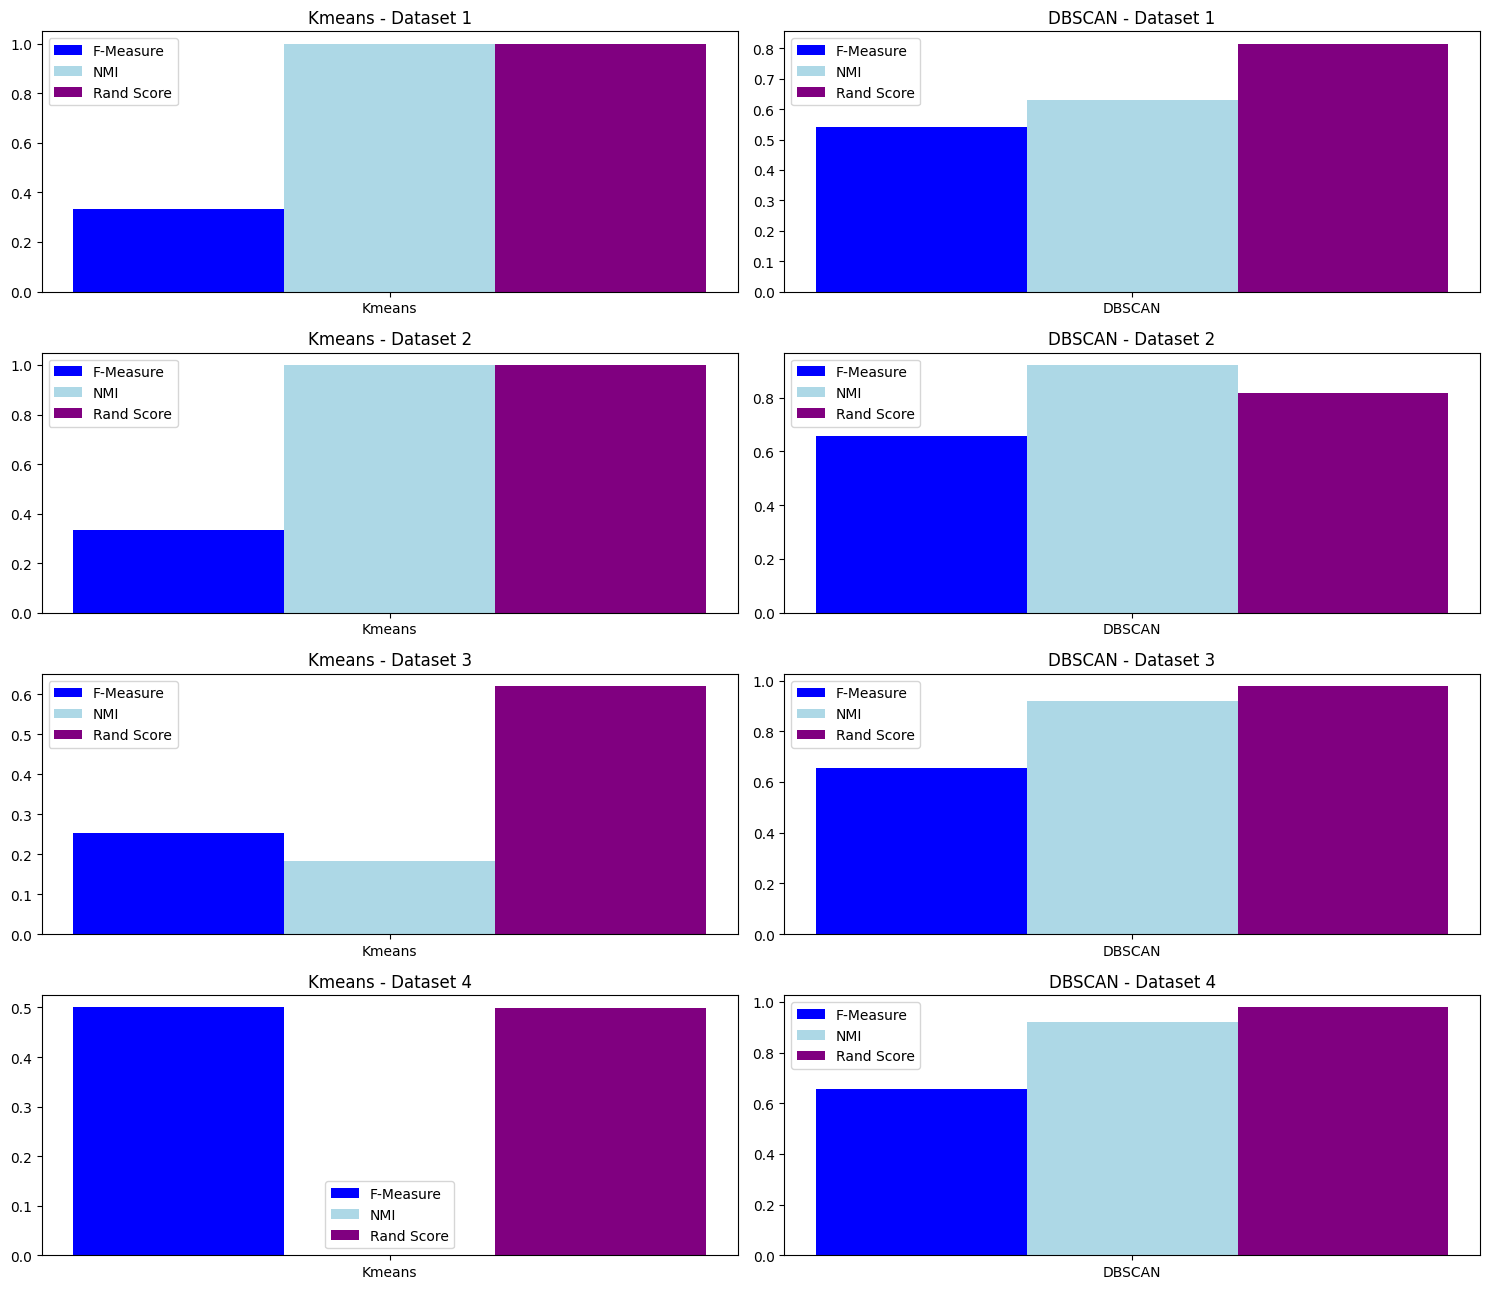

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Unique algorithms and datasets
algorithms = df['Algorithm'].unique()
datasets = df['Dataset'].unique()

# Set up subplots
fig, axes = plt.subplots(len(datasets), len(algorithms), figsize=(15, 13))

# Iterate through datasets and algorithms
for i, dataset in enumerate(datasets):
    for j, algorithm in enumerate(algorithms):
        subset_df = df[(df['Dataset'] == dataset) & (df['Algorithm'] == algorithm)]
        x_values = np.arange(len(subset_df))

        # Bar chart for F-Measure
        axes[i, j].bar(x_values - 0.2, subset_df['F-Measure'], width=0.2, label='F-Measure', color='blue')

        # Bar chart for NMI
        axes[i, j].bar(x_values, subset_df['NMI'], width=0.2, label='NMI', color='lightblue')

        # Bar chart for Rand Score
        axes[i, j].bar(x_values + 0.2, subset_df['Rand Score'], width=0.2, label='Rand Score', color='purple')

        axes[i, j].set_title(f'{algorithm} - {dataset}')
        axes[i, j].set_xticks(x_values)
        axes[i, j].set_xticklabels(subset_df['Algorithm'])
        axes[i, j].legend()

plt.tight_layout()
plt.show()